In [316]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [317]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [318]:
#Adding max_columns = None, so that I can see the whole rows and tables
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [319]:
#reading application_data.csv into df
df = pd.read_csv("application_data.csv")


# Understanding the application_data.csv

In [320]:
df.shape

(307511, 122)

In [321]:
df.describe()

# After seeing the data distribution across different columns, I could see that,
# - There are some outliers in some of the columns ( by comparing max , median and mean rows)
# - There are some negative values in some columns, which we have to make it absolute.
# - There are some variables that will not add any value in analysis, (i'll check it later)

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307511.000 307511.000    307511.000        307511.000  307511.000   
mean   278180.519      0.081         0.417        168797.919  599026.000   
std    102790.175      0.272         0.722        237123.146  402490.777   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189145.500      0.000         0.000        112500.000  270000.000   
50%    278202.000      0.000         0.000        147150.000  513531.000   
75%    367142.500      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307499.000       307233.000                  307511.000  307511.000   
mean     27108.574       538396.207                       0.021   16036.995   
std      14493.737       369446.461                       0.014    4363.989   
min       1615.500        40500.000                       0.000   25229.000   
25%      16524.000       238500.000                       0.010   19682.000   
50%      24903.000       450000.000                       0.019   15750.000   
75%      34596.000       679500.000                       0.029   12413.000   
max     258025.500      4050000.000                       0.073    7489.000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count     307511.000         307511.000       307511.000   104582.000   
mean       63815.046           4986.120         2994.202       12.061   
std       141275.767           3522.886         1509.450       11.945   
min        17912.000          24672.000         7197.000        0.000   
25%         2760.000           7479.500         4299.000        5.000   
50%         1213.000           4504.000         3254.000        9.000   
75%          289.000           2010.000         1720.000       15.000   
max       365243.000              0.000            0.000       91.000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000      307511.000       307511.000        307511.000   
mean        1.000           0.820            0.199             0.998   
std         0.002           0.384            0.400             0.043   
min         0.000           0.000            0.000             0.000   
25%         1.000           1.000            0.000             1.000   
50%         1.000           1.000            0.000             1.000   
75%         1.000           1.000            0.000             1.000   
max         1.000           1.000            1.000             1.000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000  307511.000       307509.000            307511.000   
mean        0.281       0.057            2.153                 2.052   
std         0.450       0.231            0.911                 0.509   
min         0.000       0.000            1.000                 1.000   
25%         0.000       0.000            2.000                 2.000   
50%         0.000       0.000            2.000                 2.000   
75%         1.000       0.000            3.000                 2.000   
max         1.000       1.000           20.000                 3.000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                   307511.000               307511.000   
mean                         2.032                   12.063   
std                          0.503                    3.266   
min                          1.000                    0.000   
25%                          2.000                   10.000   
50%                          2.000                   12.000   
75%                          2.000                   14.000   
max                          3.000                   23.000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                

In [322]:
###### Getting some basic info about the dataset, including the datatype each variable has, column count and row count.
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


# Cleaning of application_data.csv 


In [323]:
missing_values = df.isnull().sum()/len(df)*100
missing_values.sort_values(ascending=False) # Sorting the values in ascending order

COMMONAREA_MEDI                69.872
COMMONAREA_AVG                 69.872
COMMONAREA_MODE                69.872
NONLIVINGAPARTMENTS_MODE       69.433
NONLIVINGAPARTMENTS_AVG        69.433
NONLIVINGAPARTMENTS_MEDI       69.433
FONDKAPREMONT_MODE             68.386
LIVINGAPARTMENTS_MODE          68.355
LIVINGAPARTMENTS_AVG           68.355
LIVINGAPARTMENTS_MEDI          68.355
FLOORSMIN_AVG                  67.849
FLOORSMIN_MODE                 67.849
FLOORSMIN_MEDI                 67.849
YEARS_BUILD_MEDI               66.498
YEARS_BUILD_MODE               66.498
YEARS_BUILD_AVG                66.498
OWN_CAR_AGE                    65.991
LANDAREA_MEDI                  59.377
LANDAREA_MODE                  59.377
LANDAREA_AVG                   59.377
BASEMENTAREA_MEDI              58.516
BASEMENTAREA_AVG               58.516
BASEMENTAREA_MODE              58.516
EXT_SOURCE_1                   56.381
NONLIVINGAREA_MODE             55.179
NONLIVINGAREA_AVG              55.179
NONLIVINGARE

#### After analysing the missing values, it is observed that some columns are having more missing values, like more than 40 percent, its okay to drop these columns, since imputing might create false reports.

In [324]:
# Dropping the columns by taking 40 percent as the threshold for missing values.
threshold = 40
columns_to_drop = [column for column in df.columns if df[column].isnull().mean() > threshold / 100]
df = df.drop(columns=columns_to_drop)
df.shape


(307511, 73)

#### There are some variables that might not add value in  the data analysis process. So I will investigate those and drop if its not needed.
#### 1. FLAG_DOCUMENTS

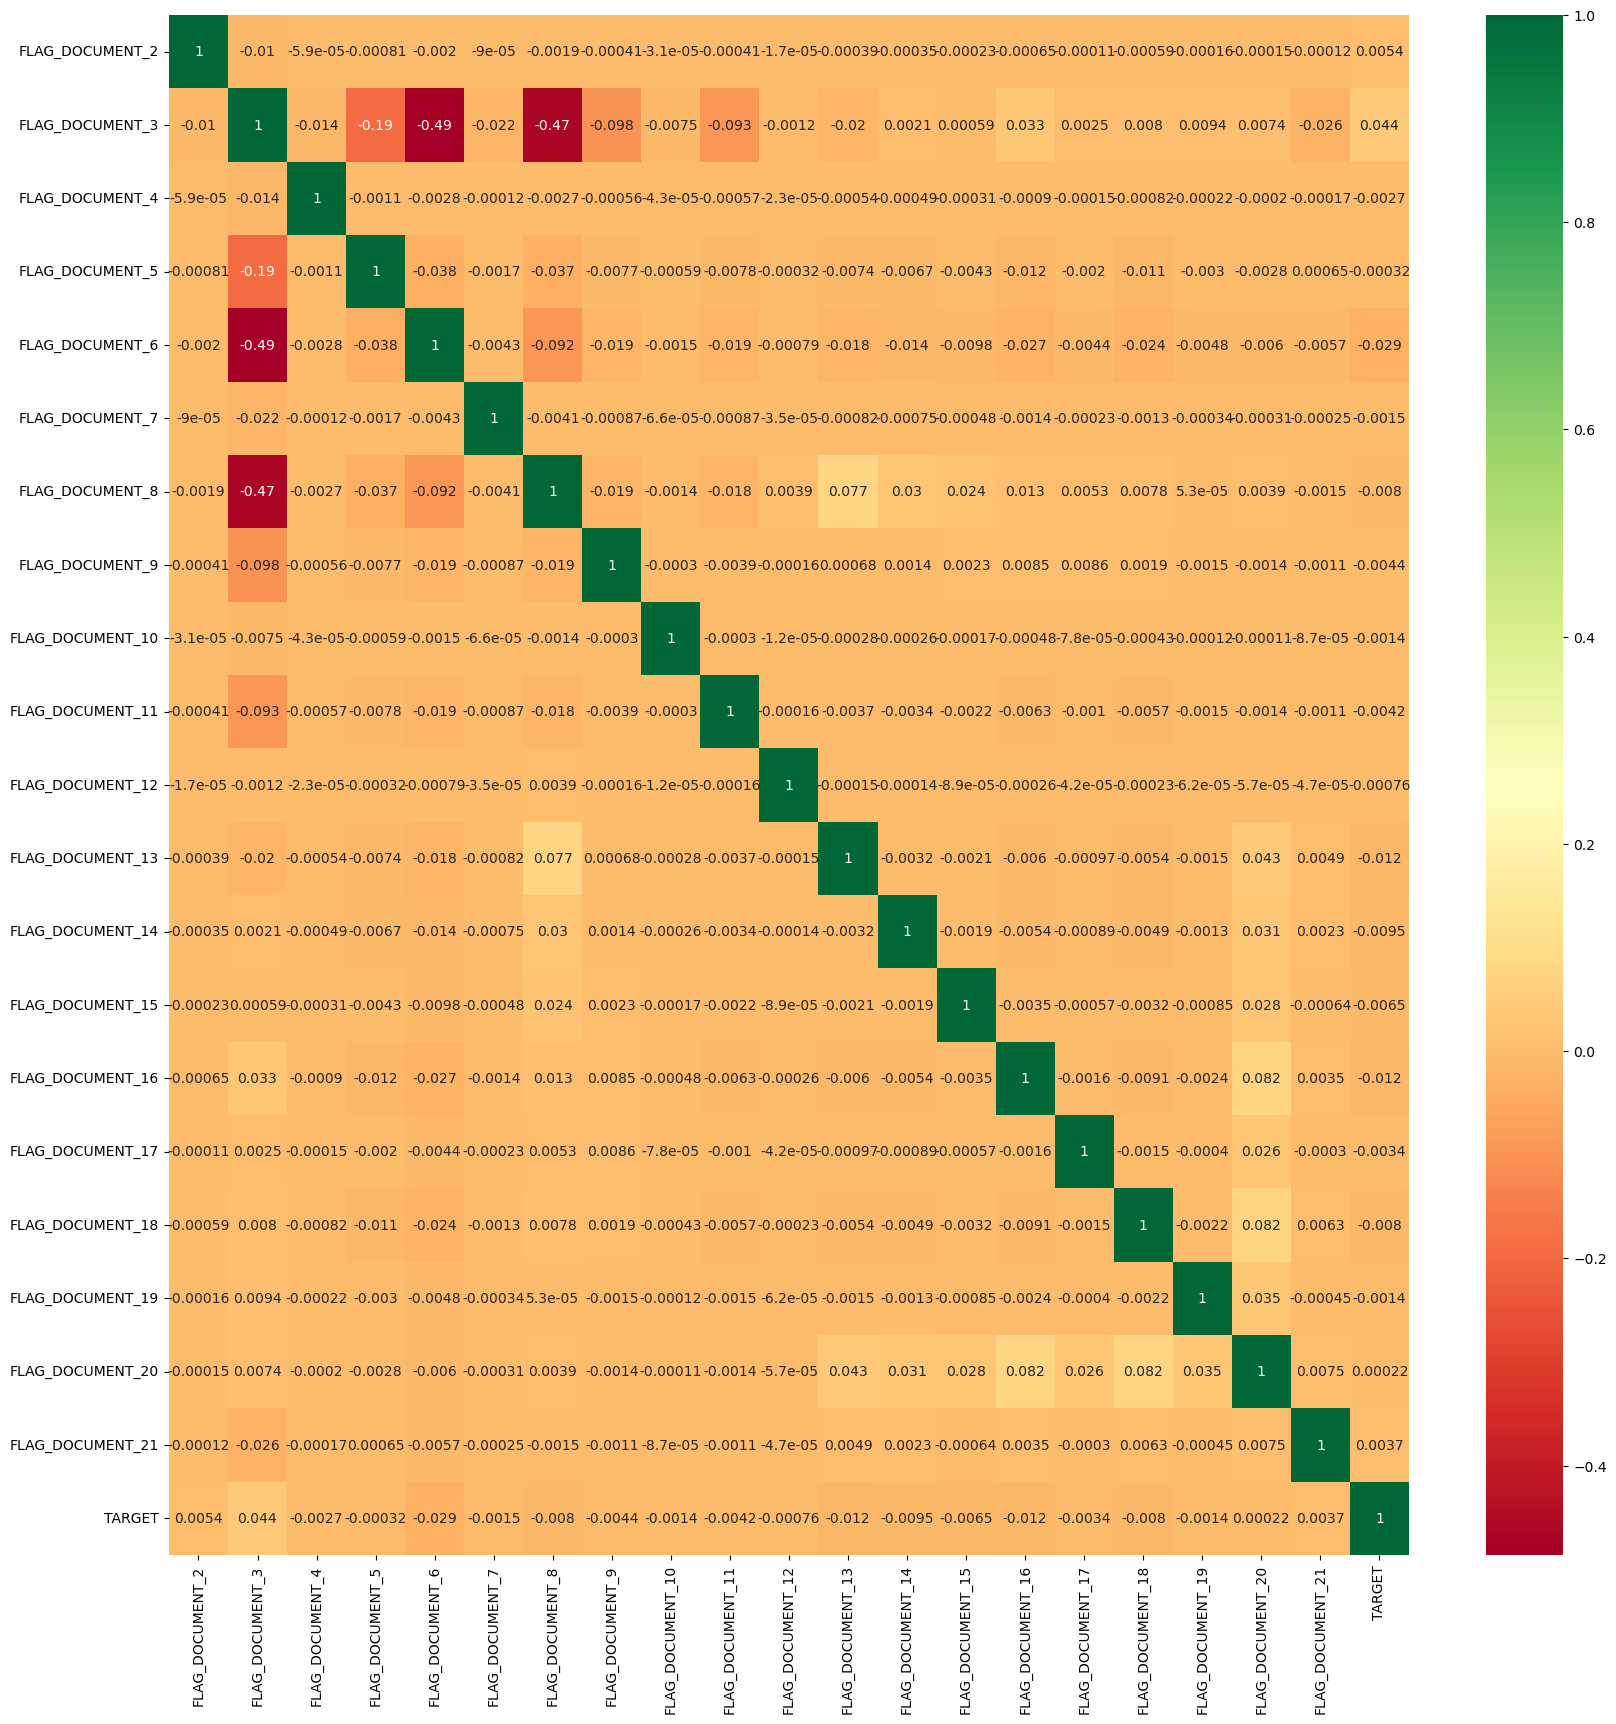

In [325]:
#Dropping documents columns since I assume that documents submitted wont directly link to loan defaulters.
flag_document_columns = [col for col in df.columns if col.startswith('FLAG_DOCUMENT')]
flag_document_columns.append('TARGET')
plt.figure(figsize=(20,20))
sns.heatmap(df[flag_document_columns].corr(), annot= True, cmap= "RdYlGn")
plt.show()


#### From the heatmaps its evident that the FLAG DOCUMENTS dont really have any relation with the TARGET variable, Hence its okay to be dropped.

In [326]:
# TDropping columns that are related to FLAG DOCUMENTS
flag_document_columns = [col for col in df.columns if col.startswith('FLAG_DOCUMENT')]
df = df.drop(columns=flag_document_columns)
df.shape

(307511, 53)

#### 2. Other FLAG Variables

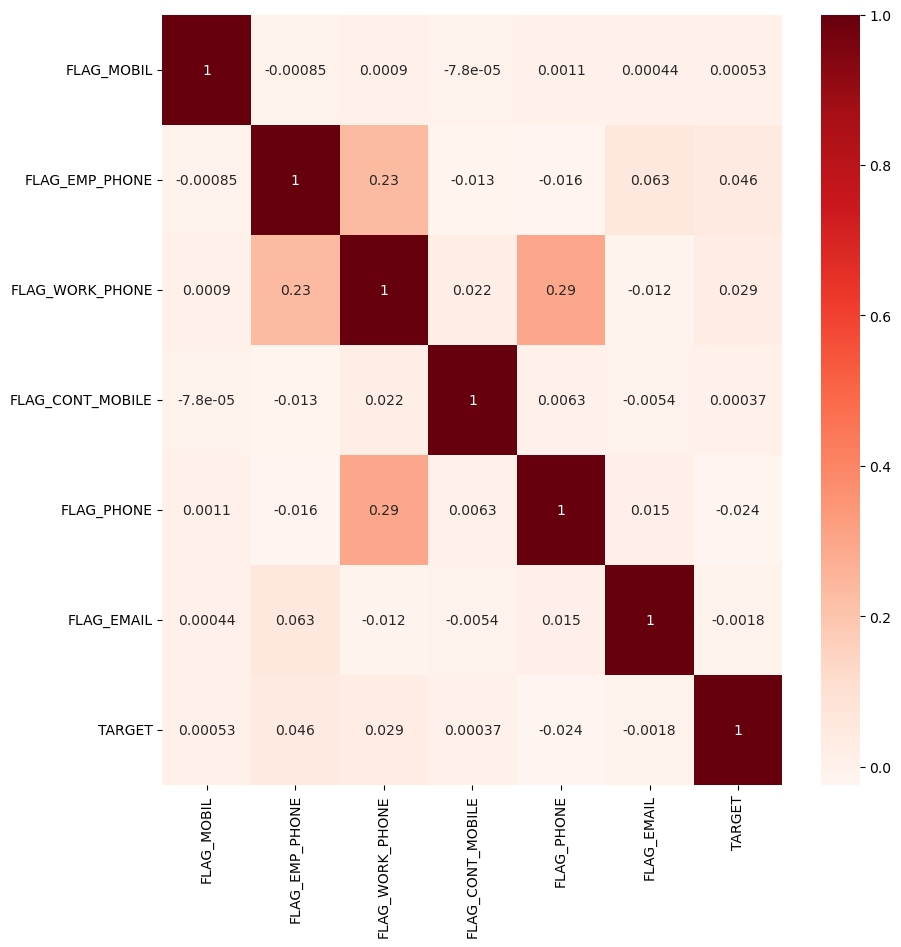

In [327]:
columns_flag=['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']
columns_flag.append('TARGET')
plt.figure(figsize=(10,10))
sns.heatmap(df[columns_flag].corr(), annot= True, cmap= "Reds")
plt.show()

#### From the above heatmap, it is clear that these flag variables dont really have any relation with the TARGET variable, hence dropping these columns.

In [328]:
columns_flag=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']
flag_document_columns = [col for col in df.columns if col.startswith('FLAG_DOCUMENT')]
df = df.drop(columns=columns_flag)
df.shape

(307511, 47)

#### 3. EXT_SOURCE* Variables

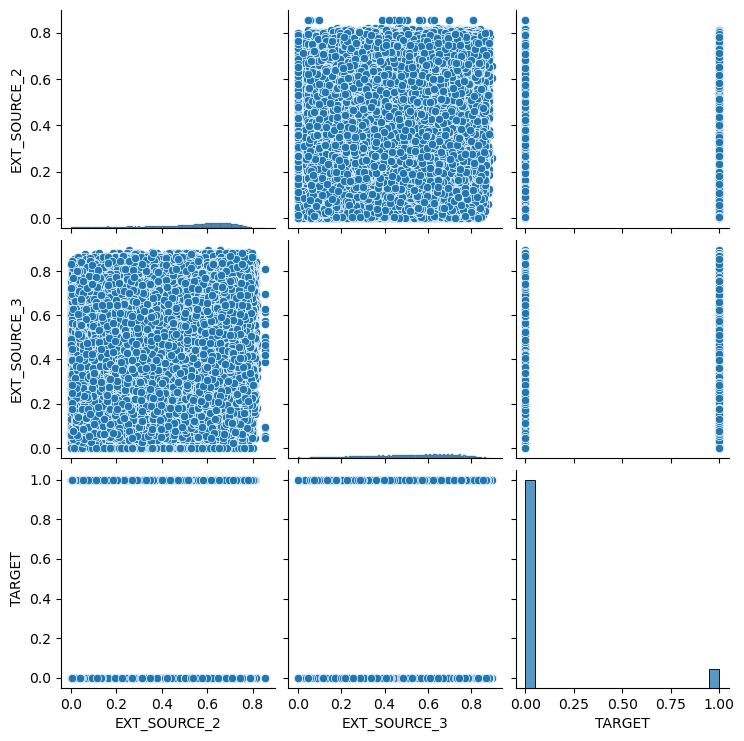

In [329]:
sns.pairplot(data=df, vars=["EXT_SOURCE_2","EXT_SOURCE_3", "TARGET"])
plt.show()

#### From the above pairplot, its evident that these two EXT_SOURCE* variables dont really have any relation with the TARGET variable, and it looks like for both defaulters and repayers, its almost the similar values.

In [330]:
# Dropping EXT_SOURCE_2,EXT_SOURCE_3,since it does not add any value in decision making 
df = df.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3"])
df.shape

(307511, 45)

# Handling missing values 

In [331]:
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
O

#### 1. AMT_ANNUITY

In [332]:
df['AMT_ANNUITY'].describe()
df['AMT_ANNUITY'].quantile((0.1,0.2,0.3,0.5,0.8,0.9,0.91,0.93,0.96,0.99,1))

0.100    11074.500
0.200    14701.500
0.300    18189.000
0.500    24903.000
0.800    37516.500
0.900    45954.000
0.910    47254.500
0.930    49878.000
0.960    55624.500
0.990    70006.500
1.000   258025.500
Name: AMT_ANNUITY, dtype: float64

In [333]:
# There are outliers in AMT_ANNUTY because the difference between 99th percentile and max value is huge
# So, we can impute the median to missing spots.
median_annuity = df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(median_annuity)
df.AMT_ANNUITY.isnull().sum()

0

#### 2. CNT_FAM_MEMBERS

In [334]:
df['CNT_FAM_MEMBERS'].describe()

count   307509.000
mean         2.153
std          0.911
min          1.000
25%          2.000
50%          2.000
75%          3.000
max         20.000
Name: CNT_FAM_MEMBERS, dtype: float64

In [335]:
#Since the mean,median and mode is 2, we can inpute 2 for the null values.

mean_cnt_members = int(df["CNT_FAM_MEMBERS"].describe()[1])
df['CNT_FAM_MEMBERS'] = df.CNT_FAM_MEMBERS.fillna(mean_cnt_members)
df.CNT_FAM_MEMBERS.isnull().sum()

0

#### 3. DAYS_LAST_PHONE_CHANGE

In [336]:
#Since there is only missing value in DAYS_LAST_PHONE_CHANGE, we can drop that row
#------------also can fill with mean--------------#
df = df.dropna(subset=['DAYS_LAST_PHONE_CHANGE'])
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

#### 4. AMT_GOODS_PRICE

In [337]:
pd.set_option('display.float_format', lambda x: '%.3f' % abs(x)) #to get he absolute value for better visibilty
df.AMT_GOODS_PRICE.describe()

count    307232.000
mean     538397.140
std      369446.700
min       40500.000
25%      238500.000
50%      450000.000
75%      679500.000
max     4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

In [338]:
## Since the max and 75th percentile difference is large and std also is huge when comparing with mean, 
## so cant use mean here. using median here.
median_goods_price = df["AMT_GOODS_PRICE"].median()
df['AMT_GOODS_PRICE'] = df.AMT_GOODS_PRICE.fillna(median_goods_price)
df.AMT_GOODS_PRICE.isnull().sum()

0

#### 5. DEF_CNT_SOCIAL_CIRCLE

In [339]:
df.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count   306489.000
mean         0.143
std          0.447
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         34.000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [340]:
df.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count   306489.000
mean         0.100
std          0.362
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         24.000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [341]:
## we can see that for the two columns listed above,there is a huge outlier and difference between 75th perntle and max
## I think we can use the median value here.
median_value = df["DEF_60_CNT_SOCIAL_CIRCLE"].median()
df["DEF_60_CNT_SOCIAL_CIRCLE"] = df["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(median_value)
df["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

df["DEF_30_CNT_SOCIAL_CIRCLE"] = df["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(median_value)
df["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

#### 6. OBS_CNT_SOCIAL_CIRCLE

In [342]:
df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306489.000
mean         1.422
std          2.401
min          0.000
25%          0.000
50%          0.000
75%          2.000
max        348.000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [343]:
df.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count   306489.000
mean         1.405
std          2.380
min          0.000
25%          0.000
50%          0.000
75%          2.000
max        344.000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [344]:
## for OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE, the 75th percentile is 2 and median is 0 
## i think we can impute it with 1( taking the middle) (cleary there are outliers. need to handle)
df["OBS_60_CNT_SOCIAL_CIRCLE"] = df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(1)
df["OBS_30_CNT_SOCIAL_CIRCLE"] = df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(1)
df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### 7. NAME_TYPE_SUITE

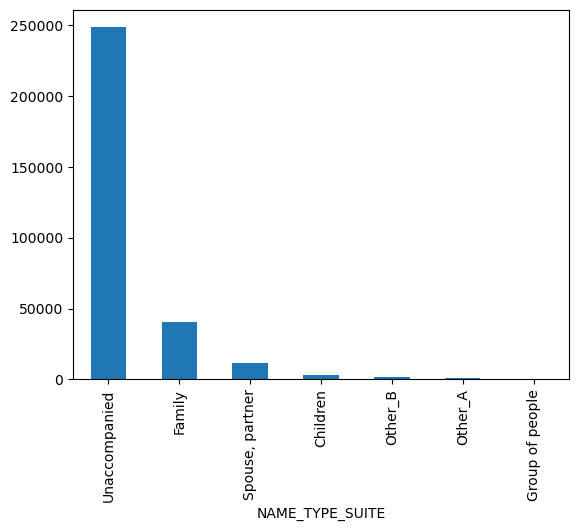

In [345]:
df.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.show()


In [346]:
##Since unaccompanied is more, we can impute the mode value to the null values.
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].fillna('Unaccompanied')
df.NAME_TYPE_SUITE.isnull().sum()

0

#### 8. AMT_REQ * Variables

In [347]:
float(100.0*(df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())/len(df))
#The percentage of missing values is 13.5 percent in AMT_REQ_CREDIT_BUREAU_QRT and its same for other AMT_REQ*

13.501349549608143

In [348]:
df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count   265992.000
mean         0.007
std          0.111
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          9.000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [349]:
## since the most occuring frequency is of '0' we can inpute 0 to the missing values for all AMT_REQ *
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0,inplace=True)



#### 9. OCCUPATION_TYPE

In [350]:
float(100.0 *(df.OCCUPATION_TYPE.isnull().sum())/len(df))
#percentage of missing vlaues in OCCUPATION TYPE is more than 30 percent

31.345322103346234

In [351]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [352]:
##the mode value is laborers, either we can impute missing values as "Laborers"
# or we can add a separate category called "Unknown"
## edit --  When 'Unkonwn' is used, since the percentage of missing values is more than 30, there created another huge 
# category with Unkown, so filling it with laborers.
df.OCCUPATION_TYPE.fillna('Laborers',inplace=True)
df.OCCUPATION_TYPE.isnull().sum()

0

In [353]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019       -9461           -637           3648.000   
1                       0.004      -16765          -1188           1186.000   
2                       0.010      -19046           -225           4260.000   
3                       0.008      -19005          -3039           9833.000   
4                       0.029      -19932          -3038           4311.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers            1.000                     2   
1             -291      Core staff            2.000                     1   
2            -2531        Laborers            1.000                     2   
3            -2437        Laborers            2.000                     2   
4            -3458      Core staff            1.000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

# Data Standardization

In [354]:
## Some columns are having negative values, but these are valid because 
## DAYS_BIRTH will be calcaluted in negative considering the days are taken at the time of application
## but it will be useful if we can conver the birth days into years, by dividing it with 365 (no of days in year)

## first these columns need to be converted to absolute values

columns_to_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
df[columns_to_convert] = df[columns_to_convert].abs()

df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019        9461            637           3648.000   
1                       0.004       16765           1188           1186.000   
2                       0.010       19046            225           4260.000   
3                       0.008       19005           3039           9833.000   
4                       0.029       19932           3038           4311.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers            1.000                     2   
1              291      Core staff            2.000                     1   
2             2531        Laborers            1.000                     2   
3             2437        Laborers            2.000                     2   
4             3458      Core staff            1.000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [355]:
## now we can convert the date into years for better readability.
## caution ; to be executed once only, since if its executd again, the age will change again.
df["DAYS_BIRTH"] = df["DAYS_BIRTH"]/365
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019      25.921            637           3648.000   
1                       0.004      45.932           1188           1186.000   
2                       0.010      52.181            225           4260.000   
3                       0.008      52.068           3039           9833.000   
4                       0.029      54.608           3038           4311.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers            1.000                     2   
1              291      Core staff            2.000                     1   
2             2531        Laborers            1.000                     2   
3             2437        Laborers            2.000                     2   
4             3458      Core staff            1.000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [356]:
# Since the values are in float, need to round to int
df["DAYS_BIRTH"] = df["DAYS_BIRTH"].round().astype(int)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019          26            637           3648.000   
1                       0.004          46           1188           1186.000   
2                       0.010          52            225           4260.000   
3                       0.008          52           3039           9833.000   
4                       0.029          55           3038           4311.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers            1.000                     2   
1              291      Core staff            2.000                     1   
2             2531        Laborers            1.000                     2   
3             2437        Laborers            2.000                     2   
4             3458      Core staff            1.000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

# Handling Outliers [application_data]

In [357]:
df.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307510.000 307510.000    307510.000        307510.000  307510.000   
mean   278181.038      0.081         0.417        168798.058  599027.042   
std    102789.938      0.272         0.722        237123.519  402491.017   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189146.250      0.000         0.000        112500.000  270000.000   
50%    278202.500      0.000         0.000        147150.000  513531.000   
75%    367142.750      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307510.000       307510.000                  307510.000  307510.000   
mean     27108.492       538317.225                       0.021      43.939   
std      14493.484       369289.222                       0.014      11.964   
min       1615.500        40500.000                       0.000      21.000   
25%      16524.000       238500.000                       0.010      34.000   
50%      24903.000       450000.000                       0.019      43.000   
75%      34596.000       679500.000                       0.029      54.000   
max     258025.500      4050000.000                       0.073      69.000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count     307510.000         307510.000       307510.000       307510.000   
mean       67724.961           4986.121         2994.209            2.153   
std       139443.926           3522.892         1509.449            0.911   
min            0.000          24672.000            0.000            1.000   
25%          933.000           7479.750         1720.000            2.000   
50%         2219.000           4504.000         3254.000            2.000   
75%         5707.000           2010.000         4299.000            3.000   
max       365243.000              0.000         7197.000           20.000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count            307510.000                   307510.000   
mean                  2.052                        2.032   
std                   0.509                        0.503   
min                   1.000                        1.000   
25%                   2.000                        2.000   
50%                   2.000                        2.000   
75%                   2.000                        2.000   
max                   3.000                        3.000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count               307510.000                  307510.000   
mean                    12.063                       0.015   
std                      3.266                       0.122   
min                      0.000                       0.000   
25%                     10.000                       0.000   
50%                     12.000                       0.000   
75%                     14.000                       0.000   
max                     23.000                       1.000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                  307510.000                   307510.000   
mean                        0.051                        0.041   
std                         0.220                        0.197   
min                         0.000                        0.000   
25%                         0.000                        0.000   
50%                         0.000                        0.000   
75%                         0.000                        0.000   
max                         1.000                        1.000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count              307510.000              307510.000   
mean                    0.078                   0.230   
std                     0.268                   0.

#### 1. AMT_INCOME_TOTAL
#### Since there could be some individuals who are earning more, I'm going to bin the values such that I can get a more accurate analysis

In [358]:
# Getting quantiles for selecing the ranges for binning
df.AMT_INCOME_TOTAL.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100       81000.000
0.200       99000.000
0.300      112500.000
0.400      135000.000
0.500      147150.000
0.600      162000.000
0.700      180000.000
0.800      225000.000
0.920      292500.000
0.950      337500.000
0.990      472500.000
1.000   117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [359]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges =["0-100k","100k-150k","150k-200k","200k-250k","250k-300k","300k-350k","350k-400k","Above 400k"]
df["AMT_INCOME_TOTAL_RANGE"] = pd.cut(df.AMT_INCOME_TOTAL,bins,labels=ranges)

In [360]:
df.groupby('AMT_INCOME_TOTAL_RANGE').size()

AMT_INCOME_TOTAL_RANGE
0-100k        63698
100k-150k     91590
150k-200k     64307
200k-250k     48137
250k-300k     17039
300k-350k      8874
350k-400k      5802
Above 400k     8063
dtype: int64

#### 2. AMT_CREDIT
#### Following the same approach of binning

In [361]:
df.AMT_CREDIT.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100    180000.000
0.200    254700.000
0.300    306306.000
0.400    432000.000
0.500    513531.000
0.600    604152.000
0.700    755190.000
0.800    900000.000
0.920   1255680.000
0.950   1350000.000
0.990   1854000.000
1.000   4050000.000
Name: AMT_CREDIT, dtype: float64

In [362]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1500000,2000000,4050000]
ranges =["0-100k","100k-200k","200k-300k","300-400k","400k-500k","500k-600k","600-700k","700k-800k","800k-900k","900k-1000k","1000k-1500k","1500k-2000k","Above 2000k"]
df["AMT_CREDIT_RANGE"] = pd.cut(df.AMT_CREDIT,bins,labels=ranges)

In [363]:
df["AMT_CREDIT_RANGE"].value_counts()

AMT_CREDIT_RANGE
200k-300k      54812
1000k-1500k    39229
500k-600k      34232
400k-500k      32038
100k-200k      30140
300-400k       26338
600-700k       24049
800k-900k      21792
700k-800k      19193
900k-1000k      8927
1500k-2000k     8727
0-100k          6004
Above 2000k     2029
Name: count, dtype: int64

#### 3. AMT_ANNUITY (Binning values)

In [364]:
df.AMT_ANNUITY.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100    11074.500
0.200    14701.500
0.300    18189.000
0.400    21870.000
0.500    24903.000
0.600    28062.000
0.700    32004.000
0.800    37516.500
0.920    48465.000
0.950    53325.000
0.990    70006.500
1.000   258025.500
Name: AMT_ANNUITY, dtype: float64

In [365]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,260000]
ranges =["0-10k","10k-20k","20k-30k","30-40k","40k-50k","50k-60k","60-70k","70k-80k","Above 80k"]
df["AMT_ANNUITY_RANGE"] = pd.cut(df.AMT_ANNUITY,bins,labels=ranges)

In [366]:
df["AMT_ANNUITY_RANGE"].value_counts()

AMT_ANNUITY_RANGE
20k-30k      92477
10k-20k      83222
30-40k       58562
40k-50k      28669
0-10k        23283
50k-60k      13165
60-70k        5051
70k-80k       1558
Above 80k     1523
Name: count, dtype: int64

#### 4. AMT_GOODS_PRICE (Binning values)

In [367]:
df.AMT_GOODS_PRICE.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100    180000.000
0.200    225000.000
0.300    270000.000
0.400    378000.000
0.500    450000.000
0.600    522000.000
0.700    675000.000
0.800    814500.000
0.920   1125000.000
0.950   1305000.000
0.990   1800000.000
1.000   4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

In [368]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,4050000]
ranges =["0-100k","100k-200k","200k-300k","300-400k","400k-500k","500k-600k","600-700k","700k-800k","800k-900k","900k-1000k","Above 1000k"]
df["AMT_GOODS_PRICE_RANGE"] = pd.cut(df.AMT_GOODS_PRICE,bins,labels=ranges)

In [369]:
df["AMT_GOODS_PRICE_RANGE"].value_counts()

AMT_GOODS_PRICE_RANGE
200k-300k      62760
400k-500k      57251
600-700k       40024
Above 1000k    34119
100k-200k      32956
800k-900k      21484
300-400k       21219
500k-600k      13117
0-100k          8709
700k-800k       8110
900k-1000k      7761
Name: count, dtype: int64

#### 5. DAYS_BIRTH

In [370]:
df.DAYS_BIRTH.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100   28.000
0.200   32.000
0.300   36.000
0.400   39.000
0.500   43.000
0.600   47.000
0.700   52.000
0.800   56.000
0.920   62.000
0.950   64.000
0.990   67.000
1.000   69.000
Name: DAYS_BIRTH, dtype: float64

In [371]:
bins = [0,20,30,40,50,60,70]
ranges =["0-20Y","20-30Y","30-40Y","40-50Y","50-60Y","Above 60"]
df["DAYS_BIRTH_RANGE"] = pd.cut(df.DAYS_BIRTH,bins,labels=ranges)

In [372]:
df["DAYS_BIRTH_RANGE"].value_counts()

DAYS_BIRTH_RANGE
30-40Y      82770
40-50Y      75509
50-60Y      67955
20-30Y      48868
Above 60    32408
0-20Y           0
Name: count, dtype: int64

#### 6. DAYS_EMPLOYED - Binning

In [373]:
df.DAYS_EMPLOYED.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.92,0.95,0.99,1])

0.100      392.000
0.200      749.000
0.300     1132.000
0.400     1597.000
0.500     2219.000
0.600     3032.000
0.700     4435.000
0.800     9188.200
0.920   365243.000
0.950   365243.000
0.990   365243.000
1.000   365243.000
Name: DAYS_EMPLOYED, dtype: float64

In [374]:
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,7000,9000,366000]
ranges =['0-500D', '500D-1000D', '1000D-1500D', '1500D-2000D', '2000D-2500D', '2500D-3000D', '3000D-3500D',
          '3500D-4000D', '4000D-4500D', '4500D-5000D', '5000D-7000D', '7000D-9000D', 'Above 9000D']
df["DAYS_EMPLOYED_RANGE"] = pd.cut(df.DAYS_EMPLOYED,bins,labels=ranges)

In [375]:
df["DAYS_EMPLOYED_RANGE"].value_counts(normalize=True)

DAYS_EMPLOYED_RANGE
Above 9000D   0.201
500D-1000D    0.135
0-500D        0.132
1000D-1500D   0.113
1500D-2000D   0.090
2000D-2500D   0.068
2500D-3000D   0.058
5000D-7000D   0.050
3000D-3500D   0.046
3500D-4000D   0.034
4000D-4500D   0.026
7000D-9000D   0.024
4500D-5000D   0.021
Name: proportion, dtype: float64

# Data Cleaning [pre_application_data]

In [376]:
pre= pd.read_csv("previous_application.csv")

In [377]:
pre.shape

(1670214, 37)

In [378]:
pre.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
count 1670214.000 1670214.000  1297979.000      1670214.000 1670213.000   
mean  1923089.135  278357.174    15955.121       175233.860  196114.021   
std    532597.959  102814.824    14782.137       292779.762  318574.617   
min   1000001.000  100001.000        0.000            0.000       0.000   
25%   1461857.250  189329.000     6321.780        18720.000   24160.500   
50%   1923110.500  278714.500    11250.000        71046.000   80541.000   
75%   2384279.750  367514.000    20658.420       180360.000  216418.500   
max   2845382.000  456255.000   418058.145      6905160.000 6905160.000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774370.000      1284699.000              1670214.000   
mean           6697.402       227847.279                   12.484   
std           20921.495       315396.558                    3.334   
min               0.900            0.000                    0.000   
25%               0.000        50841.000                   10.000   
50%            1638.000       112320.000                   12.000   
75%            7740.000       234000.000                   15.000   
max         3060045.000      6905160.000                   23.000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count             1670214.000         774370.000               5951.000   
mean                    0.996              0.080                  0.188   
std                     0.059              0.108                  0.088   
min                     0.000              0.000                  0.035   
25%                     1.000              0.000                  0.161   
50%                     1.000              0.052                  0.189   
75%                     1.000              0.109                  0.193   
max                     1.000              1.000                  1.000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5951.000    1670214.000       1670214.000  1297984.000   
mean                      0.774        880.680           313.951       16.054   
std                       0.101        779.100          7127.443       14.567   
min                       0.373       2922.000             1.000        0.000   
25%                       0.716       1300.000             1.000        6.000   
50%                       0.835        581.000             3.000       12.000   
75%                       0.853        280.000            82.000       24.000   
max                       1.000          1.000       4000000.000       84.000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997149.000      997149.000                 997149.000   
mean           342209.855       13826.269                  33767.774   
std             88916.116       72444.870                 106857.035   
min              2922.000        2892.000                   2801.000   
25%            365243.000        1628.000                   1242.000   
50%            365243.000         831.000                    361.000   
75%            365243.000         411.000                    129.000   
max            365243.000      365243.000                 365243.000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997149.000        997149.000                 997149.000  
mean       76582.403         81992.344                      0.333  
std       149647.415        153303.517                      0.471  
min         2889.000          2874.000                      0.000  
25%         1314.000          1270.000                      0.000  
50%          537.000           499.000                      0.000  
75%           74.000            44.000                      1.000  
max       365243.000        365243.000                      1.000

In [379]:
## taking a list of off null values present in the table column wise
null_values= pre.isnull().sum()/len(pre)*100
null_values

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                   22.287
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT              53.636
AMT_GOODS_PRICE               23.082
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT             53.636
RATE_INTEREST_PRIMARY         99.644
RATE_INTEREST_PRIVILEGED      99.644
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE               49.120
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

In [380]:
## as we see there are some columns with more than 40 percent of missing values, we can drop that.

threshold = 40
columns_to_drop_in_pre = [column for column in pre.columns if pre[column].isnull().mean() > threshold / 100]
pre = pre.drop(columns=columns_to_drop_in_pre)

pre.shape


(1670214, 26)

In [381]:
## removing columsn that I think are unncessary, since these wont add any value to analysis, 
## deleting from both table
columns_not_needed = ["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"]
pre = pre.drop(columns=columns_not_needed, axis=1)
pre.shape

(1670214, 24)

In [382]:
pre.isnull().sum().sort_values(ascending=True)

SK_ID_PREV                          0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
DAYS_DECISION                       0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
AMT_CREDIT                          1
PRODUCT_COMBINATION               346
CNT_PAYMENT                    372230
AMT_ANNUITY                    372235
AMT_GOODS_PRICE                385515
dtype: int64

# Handlng Missing Values [pre_application_data]

#### 1. AMT_CREDIT

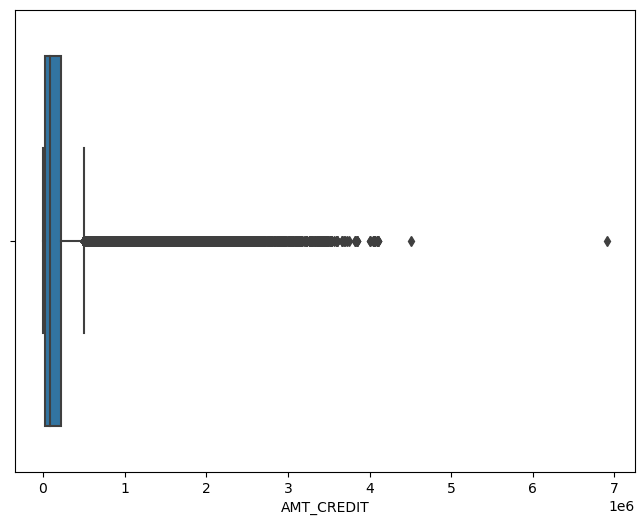

In [383]:
pre.AMT_CREDIT.describe()
plt.figure(figsize=(8, 6))
sns.boxplot(x='AMT_CREDIT', data=pre)
plt.show()

In [384]:
## Fromt he descirbe() function and boxplot we can see that we cannot take the mean value since we have outliers
## so I'm taking the mode value to Impute it to the missing slot in AMT_CREDIT

##imputing mode to the missing slot in AMT_CREDIT columnp since 0 is occuring 20 percent and no impact would be there.
len(pre[pre.AMT_CREDIT==0])/len(pre)*100  ## == ~20 percent
pre["AMT_CREDIT"].fillna(0.0,inplace=True)

In [385]:
pre.AMT_CREDIT.isnull().sum()

0

#### 2. PRODUCT_COMBINATION

In [386]:
pre.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [387]:
## since cash is the top occuring group, I'm imputing cAsh to missing values. and since the count is 340 approx.
pre.PRODUCT_COMBINATION.fillna('Cash',inplace=True)

In [388]:
pre.PRODUCT_COMBINATION.isnull().sum()

0

#### 3. CNT_PAYMENT

In [389]:
pre.CNT_PAYMENT.describe()

count   1297984.000
mean         16.054
std          14.567
min           0.000
25%           6.000
50%          12.000
75%          24.000
max          84.000
Name: CNT_PAYMENT, dtype: float64

In [390]:
## SInce mean is 16 and median 12, median is more apt in this sitation since, 75th percentile and max difference is little over the top
pre.CNT_PAYMENT.fillna(12.0,inplace=True)

In [391]:
pre.CNT_PAYMENT.isnull().sum()

0

#### 4. AMT_ANNUITY

In [392]:
pre.AMT_ANNUITY.describe()


count   1297979.000
mean      15955.121
std       14782.137
min           0.000
25%        6321.780
50%       11250.000
75%       20658.420
max      418058.145
Name: AMT_ANNUITY, dtype: float64

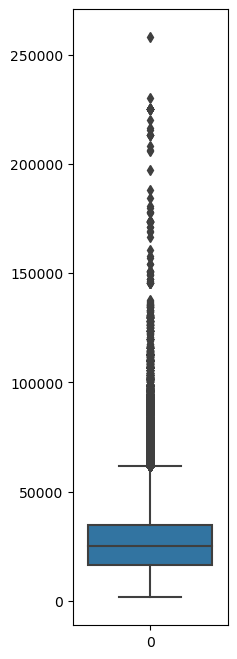

In [393]:
plt.figure(figsize=[2,8])
sns.boxplot(data=df['AMT_ANNUITY'])
plt.show()

In [394]:
## here also we can impute mean, since there are outliers( saw it in the box plot)
pre.AMT_ANNUITY.fillna(11250.0,inplace=True)

In [395]:
pre.AMT_ANNUITY.isna().sum()

0

#### 5. AMT_GOODS_PRICE

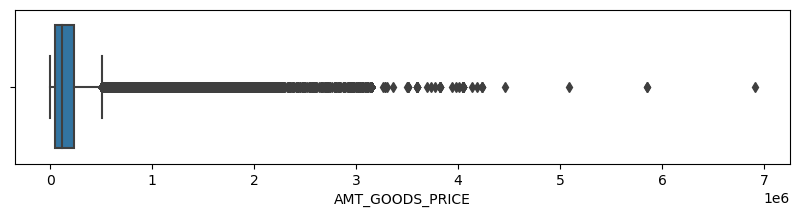

count   1284699.000
mean     227847.279
std      315396.558
min           0.000
25%       50841.000
50%      112320.000
75%      234000.000
max     6905160.000
Name: AMT_GOODS_PRICE, dtype: float64

In [396]:
plt.figure(figsize=(10, 2))
sns.boxplot(x='AMT_GOODS_PRICE', data=pre)
plt.show()
pre.AMT_GOODS_PRICE.describe()

In [397]:
##I am inputing the median vlaue 112320.0 here, since its the most occuring value.
pre.AMT_GOODS_PRICE.fillna(112320.0,inplace=True)

In [398]:
pre.AMT_GOODS_PRICE.isnull().sum()

0

# Data Standardization [pre_application_data]

In [399]:
pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0       12.000           middle  POS mobile with interest  
1       36.000       low_action          Cash X-Sell: low  
2       12.000             high         Cash X-Sell: high  
3       12.000           middle       Cash X-Sell: middle  
4       24.000             high         Cash Street: high

In [400]:
## There are some negative values here as well like int the application_dataset, so converitng that as well to asbolute

pre["DAYS_DECISION"] = pre["DAYS_DECISION"].abs()

pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0       12.000           middle  POS mobile with interest  
1       36.000       low_action          Cash X-Sell: low  
2       12.000             high         Cash X-Sell: high  
3       12.000           middle       Cash X-Sell: middle  
4       24.000             high         Cash Street: high

In [401]:
pre.to_csv("clean_pre_application_data.csv",index=False)

# Data Imbalance 

#### Data imbalance here, is the calculation of how distributed the defaulters and repayers are wrt TARGET variable.
#### Data imbalance is a practical calculation which here, can show if the bank is in a loss or profit.


In [402]:
count = df.TARGET.value_counts(normalize=True)*100
count

TARGET
0   91.927
1    8.073
Name: proportion, dtype: float64

#### From the above calculation, its evident that the default rate is 8 percent and the repayers rate is 92
#### This means that the bank is in profit, and the default rate is pretty low when compared to the repayer rate.

In [403]:
imbalance_Ratio = count[0]/count[1]
imbalance_Ratio


11.38710976837865

#### The Data Imbalance Ratio here, is the ratio between the defaulters and repayers percentage which is 92/8 = ~11
#### Therefore, the imbalance ratio here, is 1:11, which means that for every 11 loan takers 1 is a defaulter

# Univariate Analysis [application_data]

### Univariate Analysis on Categorical Variables
#### Since I have binned values for some columns which were numerical columns, I'm taking those for univariate analysis

In [404]:
# First I'm trying to find which are the columsn that are not numeric, so categorical variables,
df.select_dtypes(exclude=['float64','int64']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE',
       'AMT_GOODS_PRICE_RANGE', 'DAYS_BIRTH_RANGE', 'DAYS_EMPLOYED_RANGE'],
      dtype='object')

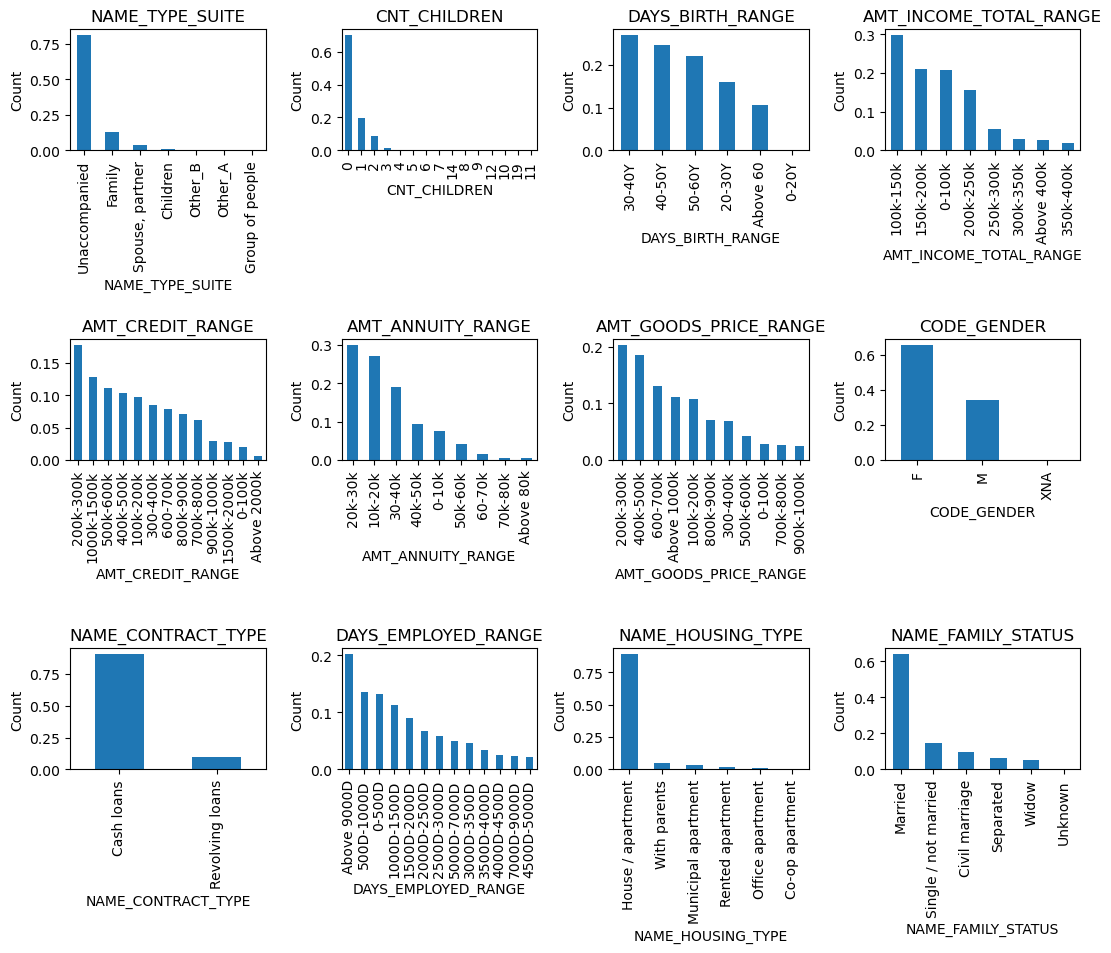

In [405]:
# NHere is a pythons script that can run through some column variables which I think is necessary.
# And create a bar plot.

numeric_cols = ['NAME_TYPE_SUITE','CNT_CHILDREN','DAYS_BIRTH_RANGE','AMT_INCOME_TOTAL_RANGE','AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE','CODE_GENDER','NAME_CONTRACT_TYPE','DAYS_EMPLOYED_RANGE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS']

def create_bar_graphs(cols,df):
    
    plt.figure(figsize=(11,11))
    for i, col in enumerate(cols, 1):
        plt.subplot(4, 4, i)
        df[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        plt.title(col, rotation=0)
        plt.ylabel('Count')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()
create_bar_graphs(numeric_cols,df)

### Inference from the graphs above
### People who applied for the most loan are: 
#### 1. People with 0 children  (70 percent aprox)
#### 2. People with 100-150k annual salary (~30%)
#### 3. People with 20k-30k annuity range. (~30 percent)
#### 4. Females with around 65 %.
#### 5. With the age group 40-50 Years. (25 %)

#### EXTRA
#### Also the average requested credit and goods price is 200k-300k  (~18 % and ~20%)
#### Cash loans are the most taken type of loans ( 90 %)
#### Pople who are 'Unaccompanied' took the most loan (80%)

### Univariate on Numerical Data.

In [406]:
df.select_dtypes(exclude='object').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE',
       'AMT_GOODS_PRICE_RANGE', '

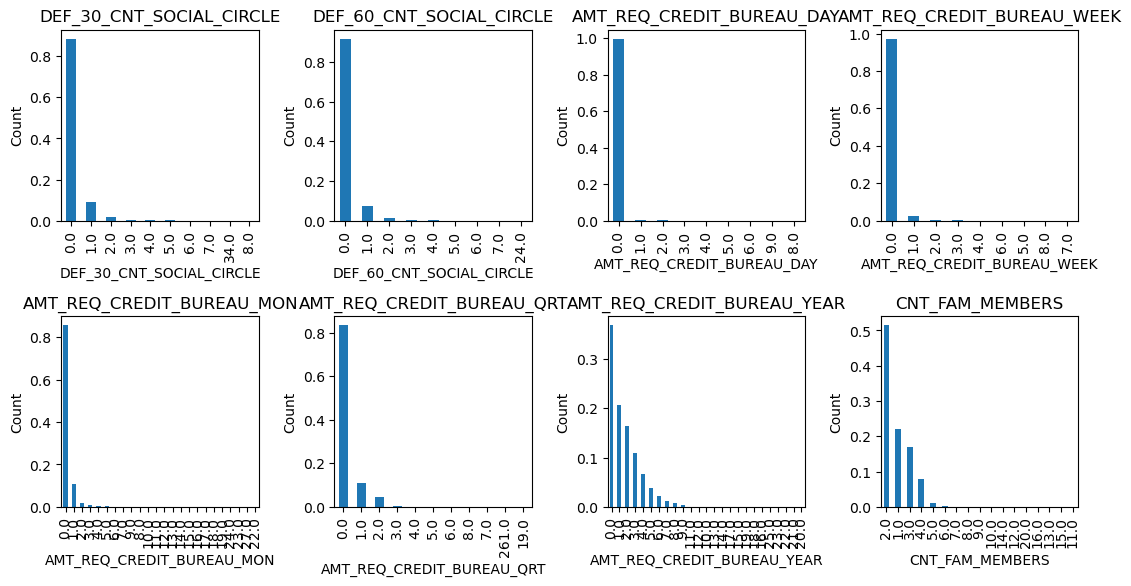

In [407]:
numeric_cols = ['DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE'
       , 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS']

def create_bar_graphs(cols,df):
    
    plt.figure(figsize=(11,11))
    for i, col in enumerate(cols, 1):
        plt.subplot(4, 4, i)
        plt.subplots_adjust(bottom=0.2)
        df[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        plt.title(col, rotation=0)
        plt.ylabel('Count')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()
create_bar_graphs(numeric_cols,df)

### Inference :
    - Most defaulters observation is 0 which is a good indicator
    - When looking at the number of requests to credit bureau, most of the count is 0 but in a year, the count is varying
    - Most loans were taken by people with 2 family members.

# Bivariate and Multivariate Analysis [application_data]

In [408]:
df.select_dtypes(include='object').head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

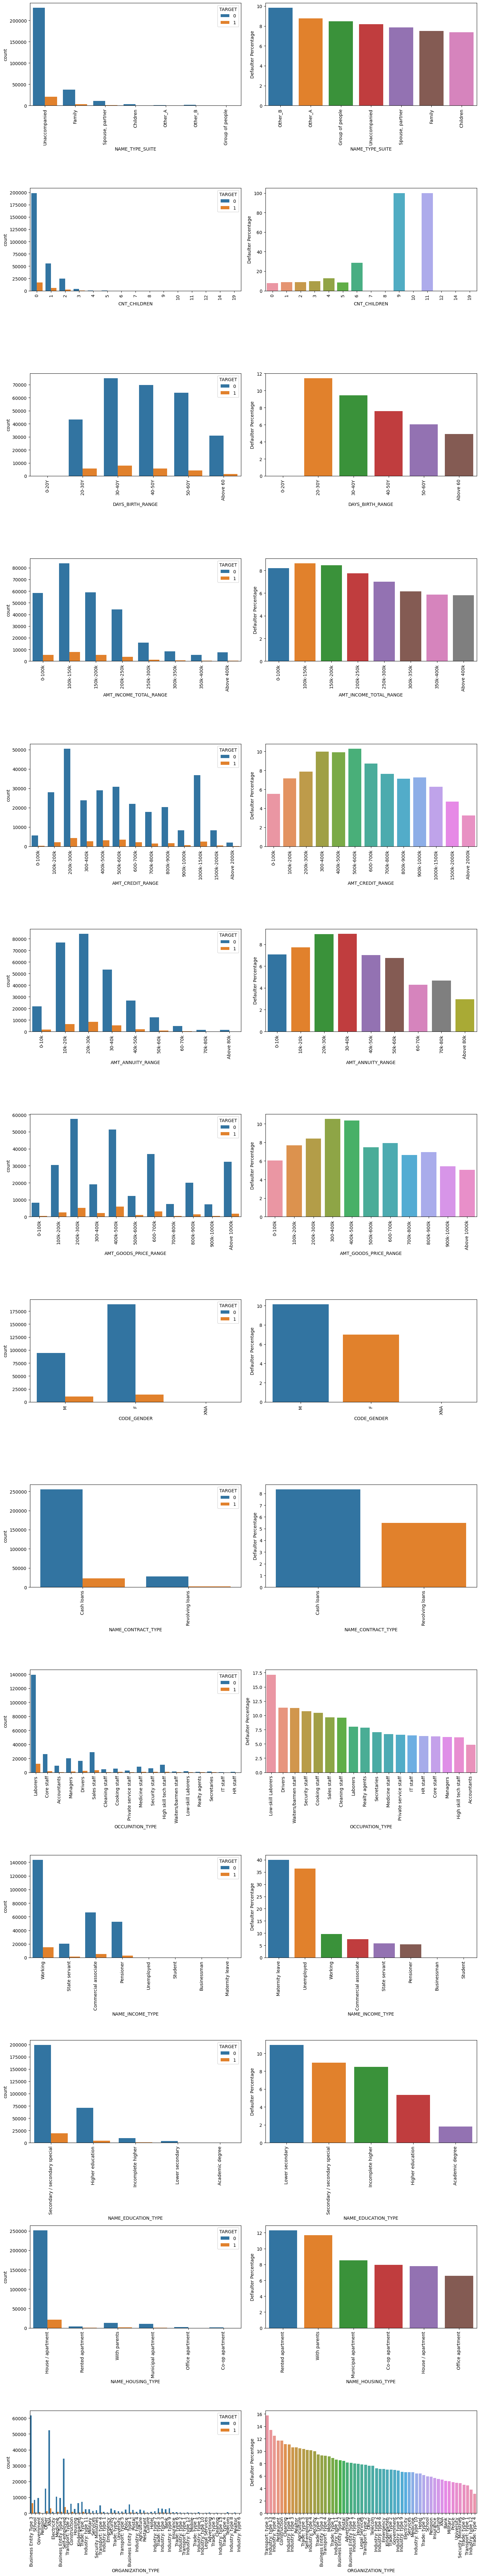

In [450]:
## Here I'm trying to calculate the percentage of defaulters with the target variable for each column
plt.figure(figsize=(15,80))
plt.subplots_adjust(hspace=0.5)
bivariate_target_cols_perc = ['NAME_TYPE_SUITE','CNT_CHILDREN','DAYS_BIRTH_RANGE','AMT_INCOME_TOTAL_RANGE',
                              'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE','CODE_GENDER',
                              'NAME_CONTRACT_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                             'NAME_HOUSING_TYPE','ORGANIZATION_TYPE']

n = len(bivariate_target_cols_perc) *2
pairs = [(i, i + 1) for i in range(1, 2 * n + 1, 2)] ##Created ordered paris to plot main graph and perc graph side by side
for i,col in enumerate(bivariate_target_cols_perc):
    plt.subplot(14, 2,pairs[i][0])
    plt.ylabel('Number of applications')
    sns.countplot(data=df,x=col,hue="TARGET")
    plt.xticks(rotation=90)
    percentage = df[[col,'TARGET']].groupby(col,as_index=False).mean() # calculating percentage of defaulters wrt to the selectd column
    percentage["Defaulter Percentage"] = percentage['TARGET'] * 100 # Diving it by 100, to get a more accurate data.
    plt.subplot(14, 2,pairs[i][1])
    plt.ylabel('Defaulter Percentage')
    sns.barplot(data=percentage.sort_values(by="Defaulter Percentage", ascending=False),x=col,y="Defaulter Percentage")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Inference from the above plots.
#### 1. NAME_TYPE_SUITE : 
    Its evident that unaccompanied took the most loan, and their default rate is ~ 8 %
#### 2. CNT_CHILDREN
    People with 0 children took the most loan the deault rate is low, therefore, they are safe to give loans.
    People with 9 or 11 children are the ones who are most likely to turn out to be a defaulter.
#### 3. DAYS_BIRTH
    People in 20-30 Years of age has the highest default rate 
    One more observation is that the default rate is decreasing with increase in age.
#### 4. AMT_INCOME_TOTAL
    People with 100-150k income are the ones who took the most loan but their default rate is also high (~8.5%)
    People with 200-250k income are safe to give loans since their default rate is comparatively low
#### 5. AMT_CREDIT
    People who have requested for 200-300k are the most, with default rate of ~8%
    People who have requested for 400-500k are the ones to avoid since their default rate is ~9.5%
#### 6. AMT_ANNUITY
    People with 20-40k annuity are most likely to be defaulters.
    People with 40-50k have average defaulters and the fourth cateogory to take the most loans.
#### 7. GENDER
    Males have the highest default rate at ~ 10% while female default rate is at ~7%
#### 8. OCCUPATION
    Laborers are the most loan takers, and their default rate is comparatively low at 9 percent
    Low Skilled labrorers have the highest default rate
#### 9. INCOME_TYPE
    People who belong to "working" as income type took the most loan and their default rate is comparetively low
    Commercial associates are also safe to give loans as their default rate is at~8%
    People with "Maternity leave" as income type has the most deafulters, but they have taken the least loans.
    Unemployed cateogry also has more default rate, so not safe to give them loans.
#### 10. CONTRACT TYPE
    Cash Loans are having the hightest default rate at ~8.5 %
    Most of the loans are also taken as CASH LOANS.
#### 11. EDUCATION TYPE
    People with Higher educaion has very low deafult rate 
    Seconday education took the most lean but they have high default rates.
#### 12. HOUSING_TYPE
    People with House or aprtment took the most loan and they have very low default rate as well
    People with rented apartment have the hightest defaulters followed by people who live with parents.
    

### CREDIT RANGE VS GOODS PRICE

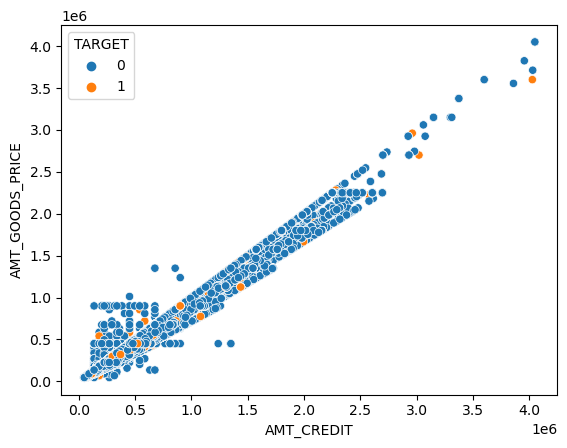

In [410]:
sns.scatterplot(data=df,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')
plt.show()

#### Inference
    AMT_CREDIT and GOODS PRICE have a strong relation and its obvious
    Also, the defaulters are concentrated between 1 and 2 million 

### AMT_CREDIT  VS AMT_INCOME_TOTAL VS TARGET


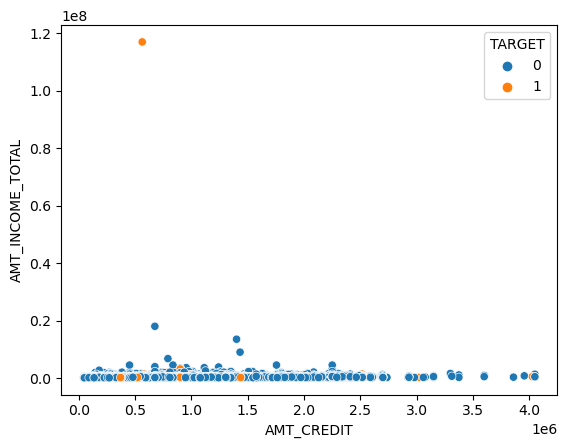

In [411]:
sns.scatterplot(data=df,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

### Inference :
    - the dafaulter rate is almost 0 after 1.5 million of amt credit
    - Pepole with less than 1 million income is more likely to take loans

### DAYS_EMPLOYED VS TARGET

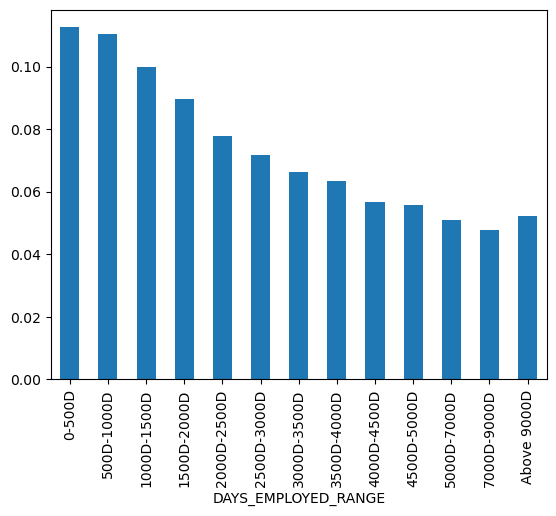

In [412]:
df.groupby("DAYS_EMPLOYED_RANGE")["TARGET"].mean().plot.bar()
plt.show()

### Inference:
    - Default rate is decresing with increase in DAYS EMPLOYED

In [413]:
#Slecting columns of type object
df.select_dtypes(include='object').head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

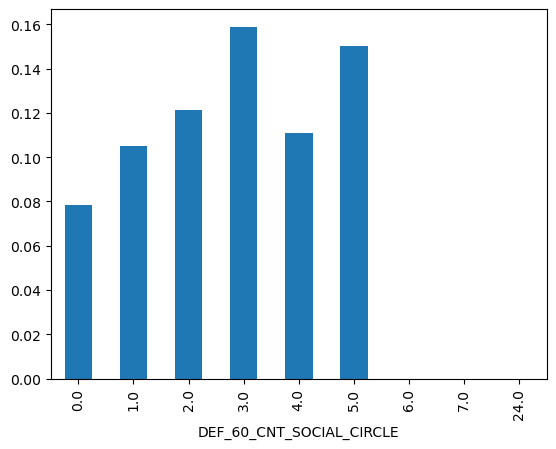

In [414]:
#Plotting barplot between DEF_60_CNT_SOCIAL_CIRCLE and TARGET
df.groupby("DEF_60_CNT_SOCIAL_CIRCLE")["TARGET"].mean().plot.bar()
plt.show()

### Inference
    - Above 29 days of Observations has highest default rate 
    - Default rate is increasing by increasing deafulters in the surroudings
   

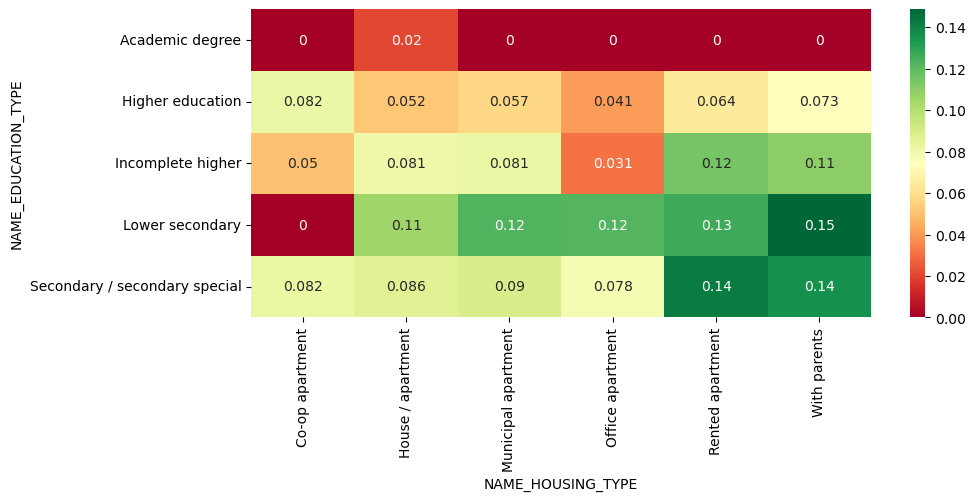

In [415]:
#Plotting heatmap between EDUCATION TYPE and HOUSING TYPE with TARGET
res=pd.pivot_table(data=df, index="NAME_EDUCATION_TYPE", columns="NAME_HOUSING_TYPE", values="TARGET")
res
plt.figure(figsize=(10,4))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### inference
    - Low skill labrores are rented apartment have high default rates
    - Smiilary waiters,barmnestaff plus co-op aprtment , high default
    - cooking staff -coop apartment, also have high default rates.
    - Also IT staff with rented apartment 
    - People with office Office apartmet has low default rates

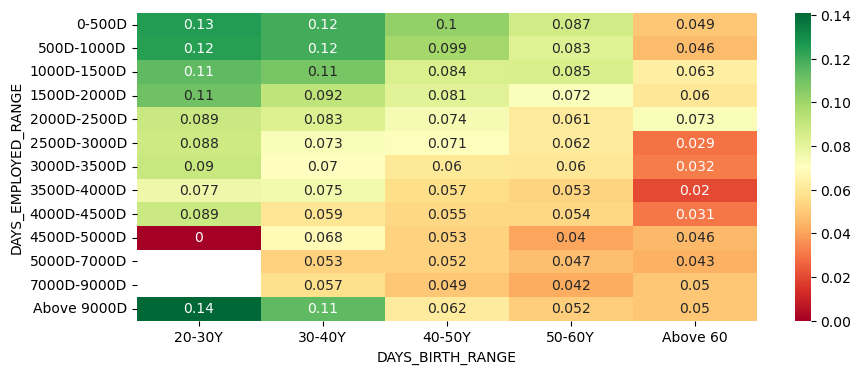

In [416]:
#Plotting DAYS_EMPLOYED_RANGE vs DAYS_BIRTH_RANGE with TARGET
res=pd.pivot_table(data=df, index="DAYS_EMPLOYED_RANGE", columns="DAYS_BIRTH_RANGE", values="TARGET")
res
plt.figure(figsize=(10,4))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### Inference:
    People deafult rate is decreasing with increase in age as wells increase in days epmployed
    Most default rate is for 20-30Y with more than 9000Days of employment ( which is impossible) 
    People with lower age group and of lower experience are more likely to default.

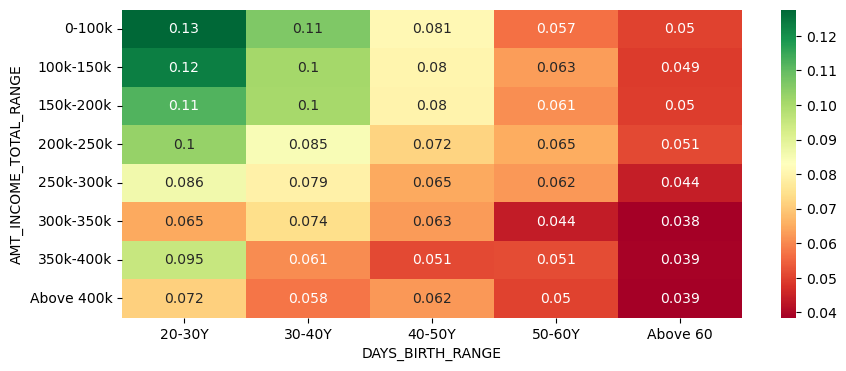

In [417]:
#PLotting Heatmap between AMT_INCOME_TOTALRANGE vs DAYS_BURTH_RANGE with TARGET
res=pd.pivot_table(data=df, index="AMT_INCOME_TOTAL_RANGE", columns="DAYS_BIRTH_RANGE", values="TARGET")
res
plt.figure(figsize=(10,4))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### Inference:
    Here also, we can see that default rate is decreasing with increase in age as wells incresing in salary
    Peoplew with 40-50 years of age with 350-400k salary is safe togive loan.

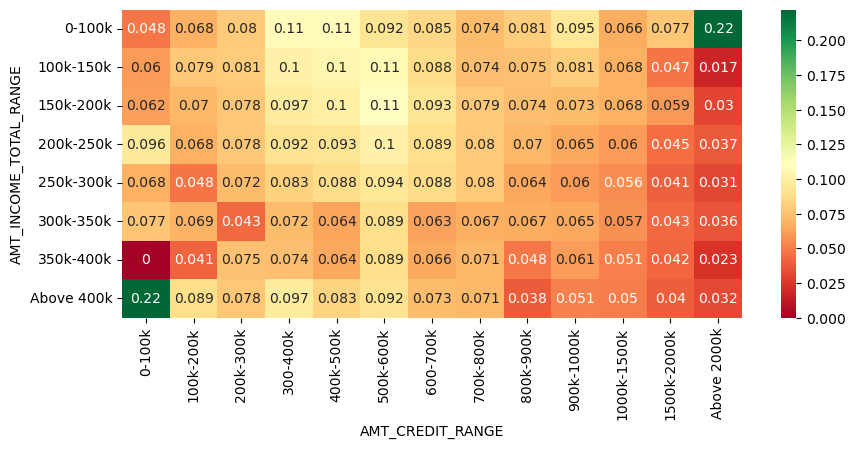

In [418]:
#Plotting graph bwetween AMT_INCOME_TOTAL_RANGE vs AMT_CREDIT_RANGE with TARGET
res=pd.pivot_table(data=df, index="AMT_INCOME_TOTAL_RANGE", columns="AMT_CREDIT_RANGE", values="TARGET")
res
plt.figure(figsize=(10,4))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### Inference:
    One of the main inference is that peple with high salary opting for low credit has high default rate
    and people with low slary opting for high credi has also high default rate.

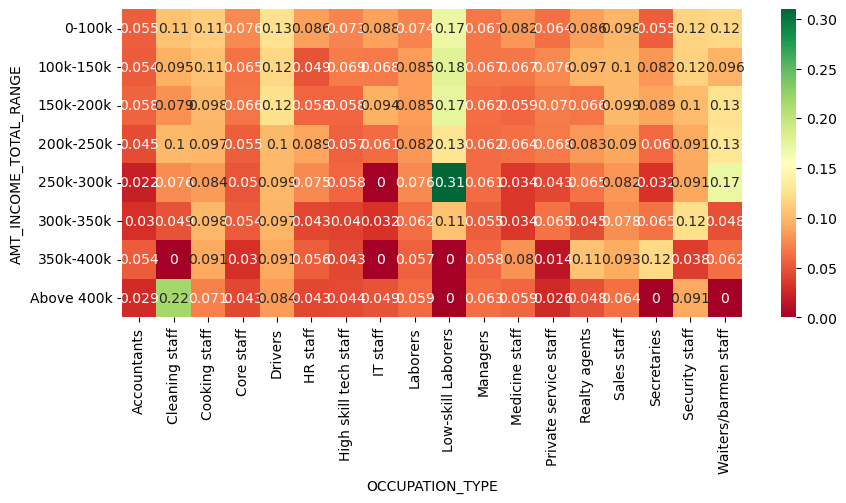

In [419]:
#PLotting heatmap between AMT_INCOMETOTAL vs OCCUPATION TYPE with TARGET
res=pd.pivot_table(data=df, index="AMT_INCOME_TOTAL_RANGE", columns="OCCUPATION_TYPE", values="TARGET")
res
plt.figure(figsize=(10,4))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### Inference :
    Cleaning staff also has high deafult rate when slary is above 400K ( outlier)

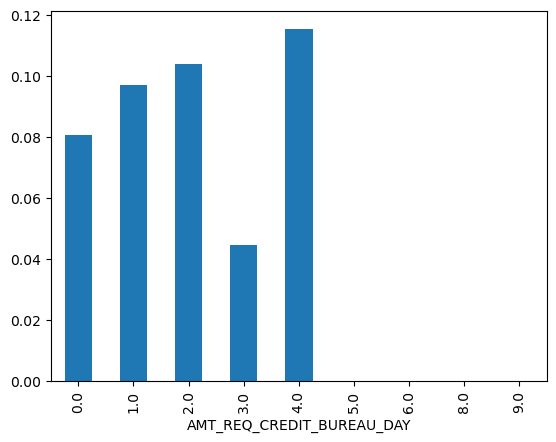

In [420]:
#PLotting bar plot between CREDIT BUREAU REQUEST in a day with TARGET
df.groupby("AMT_REQ_CREDIT_BUREAU_DAY")["TARGET"].mean().plot.bar()
plt.show()

### Creadit BUREAU YAER - upto 13 (safe , low default rate)
    CREDIT BUREAU QRT - upto 7
    CREDIT BUREAU MON - inversely proportional

# Univariate Analysis [pre_application_data]

In [421]:
pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0       12.000           middle  POS mobile with interest  
1       36.000       low_action          Cash X-Sell: low  
2       12.000             high         Cash X-Sell: high  
3       12.000           middle       Cash X-Sell: middle  
4       24.000             high         Cash Street: high

### Analysis on some cateogorical variables

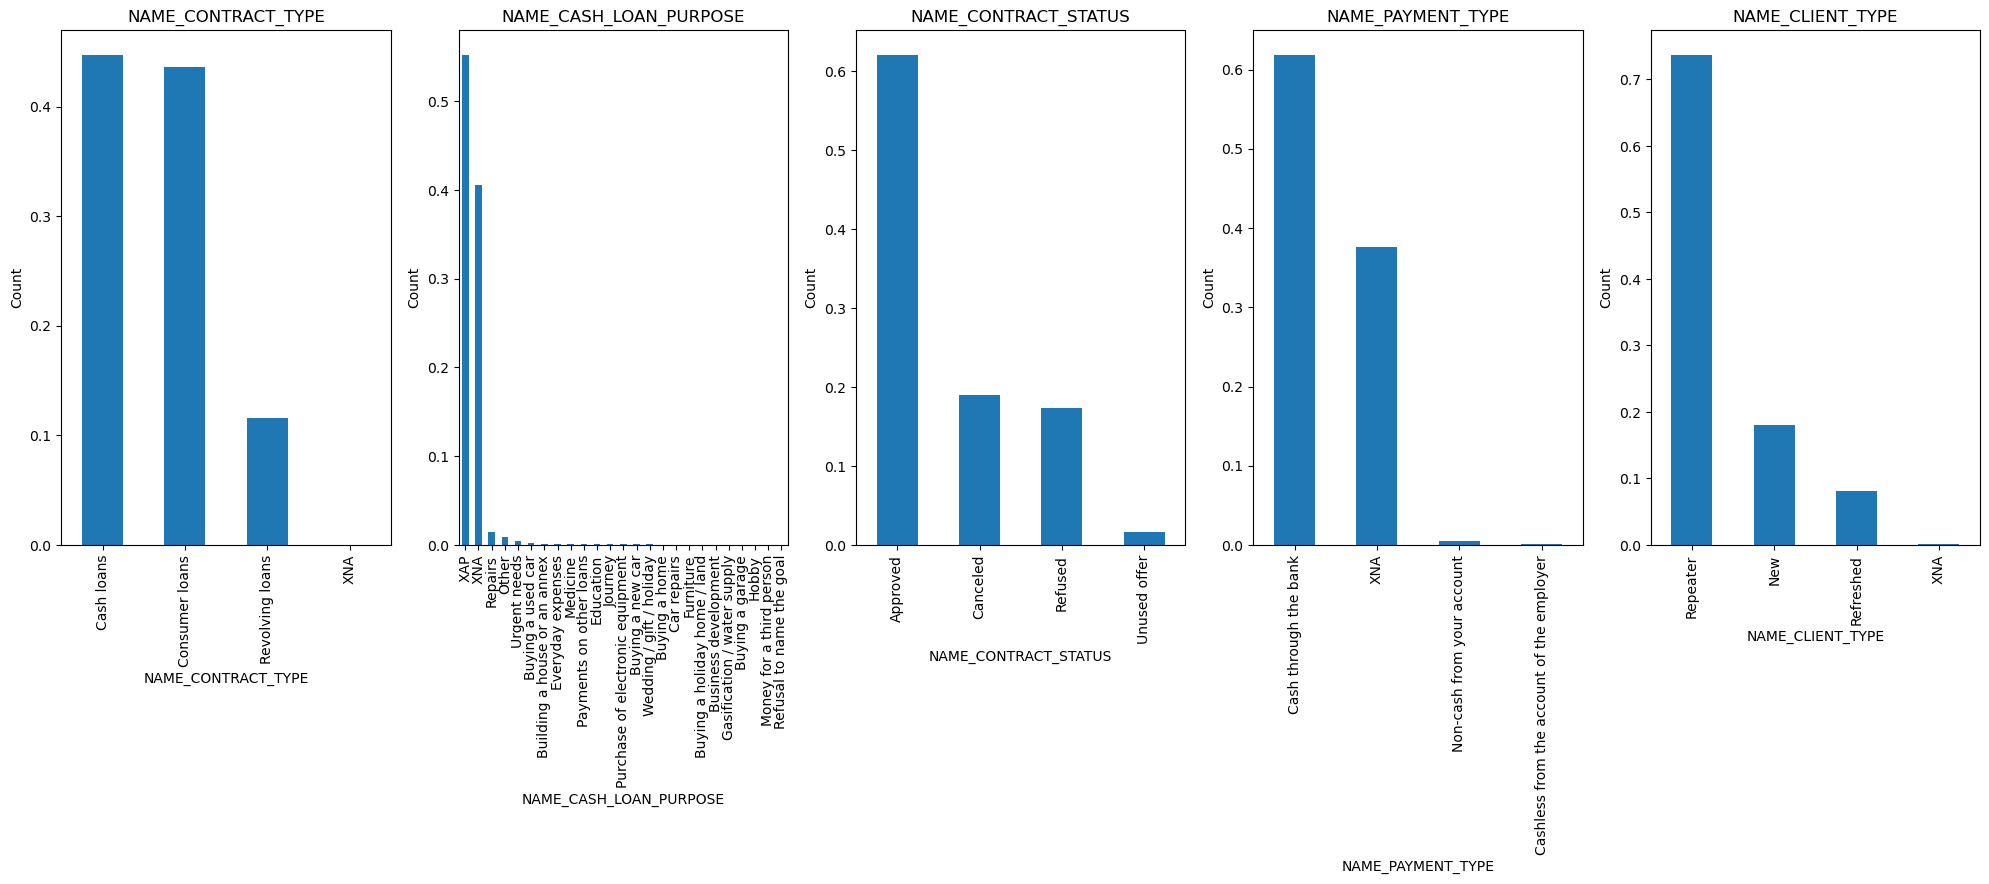

In [422]:
# NHere is a pythons script that can run through some column variables which I think is necessary.
# And create a bar plot.

pre_cols = ['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE']

def create_bar_graphs_pre(cols):
    
    plt.figure(figsize=(20,40))
    for i, col in enumerate(cols, 1):
        plt.subplot(5, 5, i)
        pre[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        plt.title(col, rotation=0)
        plt.ylabel('Count')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()
create_bar_graphs_pre(pre_cols)

### Inference : 
    - Cash loans and consumer loans were the most taken loans
    - XAP cateogy is the major laon purpose follwoed by XNA ( dont really know what this mean by )
    - About 62 percent of application were approved , 20 percent cancelled and 18 percent Refused and around 0.3 perecnt unused
    - Most of the loan takers were repeaters at around 72  percent, and new applications at around 18 percent

# Bivariate and Mulivariate Analysis on pre application data

In [423]:
pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0       12.000           middle  POS mobile with interest  
1       36.000       low_action          Cash X-Sell: low  
2       12.000             high         Cash X-Sell: high  
3       12.000           middle       Cash X-Sell: middle  
4       24.000             high         Cash Street: high

In [424]:
# hEre I;m trying to split the NAME_CONRACT STATUS columsn to separate coloumns with each
# containing flag values for each unique variable inside the NAME_CONTRACT_STATUS column

pre['APPROVED_STATUS'] = pre['NAME_CONTRACT_STATUS'] == 'Approved'
pre['CANCELED_STATUS'] = pre['NAME_CONTRACT_STATUS'] == 'Canceled'
pre['REFUSED_STATUS'] = pre['NAME_CONTRACT_STATUS'] == 'Refused'
pre['UNUSED_STATUS'] = pre['NAME_CONTRACT_STATUS'] == 'Unused offer'
pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  APPROVED_STATUS  \
0       12.000           middle  POS mobile with interest             True   
1       36.000       low_action          Cash X-Sell: low             True   
2       12.000             high         Cash X-Sell: high             True   
3       12.000           middle       Cash X-Sell: middle             True   
4       24.000             high         Cash Street: high            False   

   CANCELED_STATUS  REFUSED_STATUS  UNUSED_STATUS  
0            False           False          False  
1            False           False          False  
2            False           False          False  
3            False           False          False  
4            False            True          False

In [425]:
# Converting true or false in each column to 1 and 0, such that it will be asy to analysze

pre['APPROVED_STATUS']  =pre.APPROVED_STATUS.apply(lambda x:1 if x == True else 0)
pre['CANCELED_STATUS']  =pre.CANCELED_STATUS.apply(lambda x:1 if x == True else 0)
pre['REFUSED_STATUS']  =pre.REFUSED_STATUS.apply(lambda x:1 if x == True else 0)
pre['UNUSED_STATUS']  =pre.UNUSED_STATUS.apply(lambda x:1 if x == True else 0)

pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0   17145.000        17145.000                           Y   
1  679671.000       607500.000                           Y   
2  136444.500       112500.000                           Y   
3  470790.000       450000.000                           Y   
4  404055.000       337500.000                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  APPROVED_STATUS  \
0       12.000           middle  POS mobile with interest                1   
1       36.000       low_action          Cash X-Sell: low                1   
2       12.000             high         Cash X-Sell: high                1   
3       12.000           middle       Cash X-Sell: middle                1   
4       24.000             high         Cash Street: high                0   

   CANCELED_STATUS  REFUSED_STATUS  UNUSED_STATUS  
0                0               0              0  
1                0               0              0  
2                0               0              0  
3                0               0              0  
4                0               1              0

In [426]:
CASH_LOAN_PURPOSE = pre.groupby('NAME_CASH_LOAN_PURPOSE')['APPROVED_STATUS'].mean()*100
CASH_LOAN_PURPOSE

NAME_CASH_LOAN_PURPOSE
Building a house or an annex       25.065
Business development               30.516
Buying a garage                    28.676
Buying a holiday home / land       24.765
Buying a home                      23.121
Buying a new car                   21.838
Buying a used car                  30.506
Car repairs                        44.918
Education                          48.633
Everyday expenses                  51.159
Furniture                          44.459
Gasification / water supply        38.333
Hobby                              34.545
Journey                            45.117
Medicine                           47.700
Money for a third person           48.000
Other                              42.779
Payments on other loans            15.743
Purchase of electronic equipment   55.419
Refusal to name the goal           26.667
Repairs                            36.512
Urgent needs                       42.487
Wedding / gift / holiday           41.268
XAP        

### Inference
    Most approved loans were for Everyday expenses and the least approved loan is payments for other loans

In [427]:
pre.groupby('NAME_CASH_LOAN_PURPOSE')['UNUSED_STATUS'].mean()*100

NAME_CASH_LOAN_PURPOSE
Building a house or an annex       0.000
Business development               0.000
Buying a garage                    0.000
Buying a holiday home / land       0.000
Buying a home                      0.000
Buying a new car                   0.593
Buying a used car                  0.450
Car repairs                        0.000
Education                          0.318
Everyday expenses                  0.828
Furniture                          0.000
Gasification / water supply        0.000
Hobby                              0.000
Journey                            0.323
Medicine                           0.230
Money for a third person           0.000
Other                              0.628
Payments on other loans            0.207
Purchase of electronic equipment   0.377
Refusal to name the goal           0.000
Repairs                            0.194
Urgent needs                       0.000
Wedding / gift / holiday           0.000
XAP                               

<Figure size 2000x800 with 0 Axes>

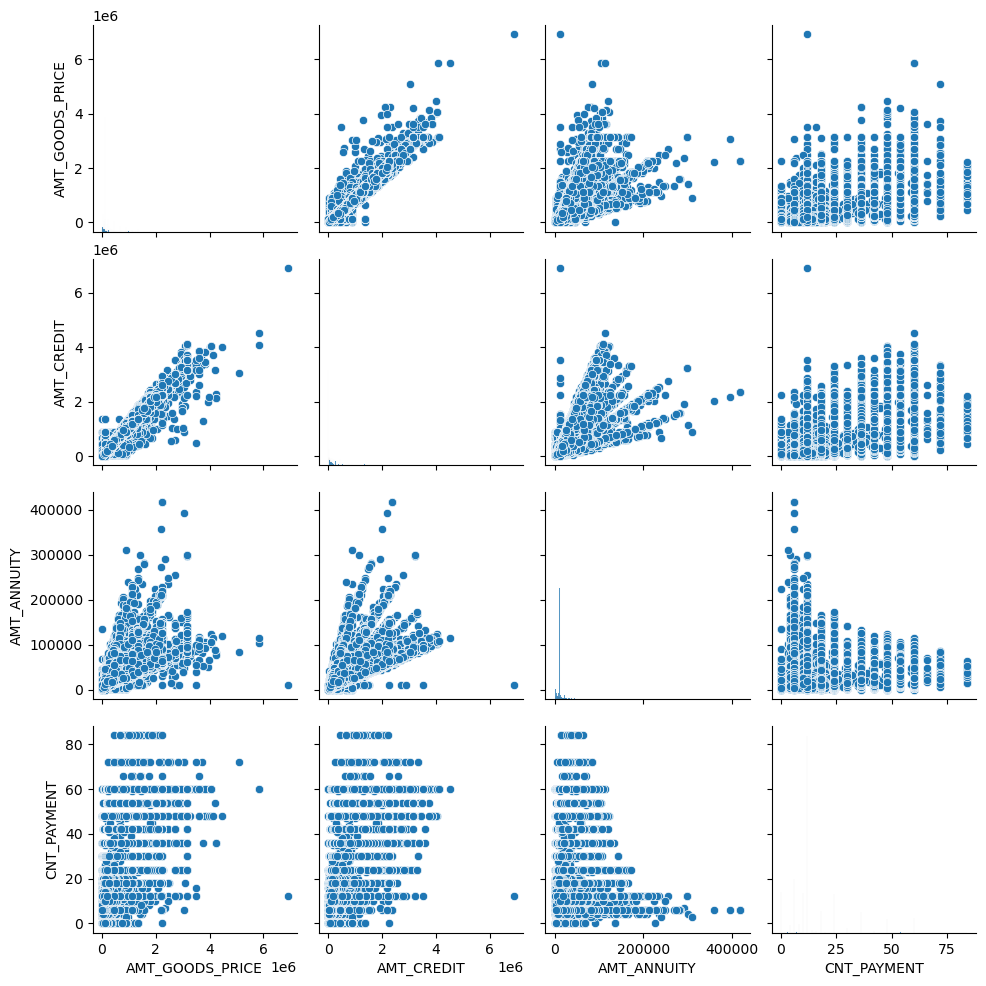

In [428]:
#Plotting pairplot with AMT_GOODSPRICE, AMT_CREDIT, AMT_ANNUITY and CNT PAYMENT
plt.figure(figsize=[20,8])
sns.pairplot(pre[['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    

### Inference
   - Strong correlation between AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, and its obvious. Its causated

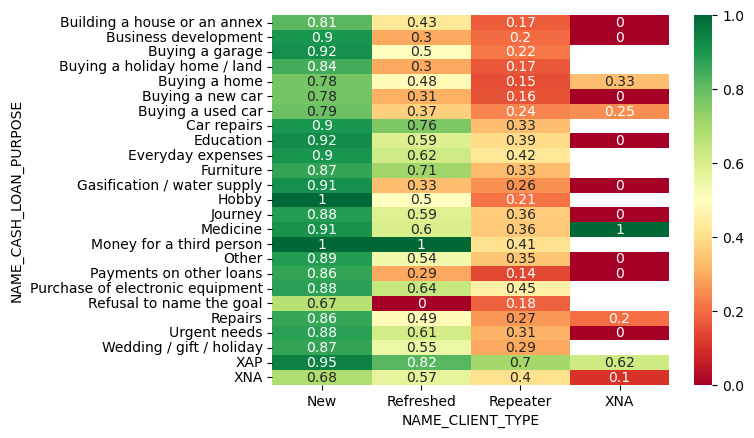

In [429]:
#Plotting heatmap between NAME_CASH)LOAN_PUPORSE and NAME_CLIENT_TYPE with APPROVED STATUS
res=pd.pivot_table(data=pre, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_CLIENT_TYPE", values="APPROVED_STATUS")
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

### Inference :
    - People who applied new loans had it approved the most

# Merging both application and pre-application

In [430]:
merge_data = pd.merge(df,pre,how='inner',on="SK_ID_CURR")
merge_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0        202500.000    406597.500   
1               N             0        270000.000   1293502.500   
2               N             0        270000.000   1293502.500   
3               N             0        270000.000   1293502.500   
4               Y             0         67500.000    135000.000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.500         351000.000   Unaccompanied          Working   
1      35698.500        1129500.000          Family    State servant   
2      35698.500        1129500.000          Family    State servant   
3      35698.500        1129500.000          Family    State servant   
4       6750.000         135000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019          26            637           3648.000   
1                       0.004          46           1188           1186.000   
2                       0.004          46           1188           1186.000   
3                       0.004          46           1188           1186.000   
4                       0.010          52            225           4260.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers            1.000                     2   
1              291      Core staff            2.000                     1   
2              291      Core staff            2.000                     1   
3              291      Core staff            2.000                     1   
4             2531        Laborers            1.000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2               

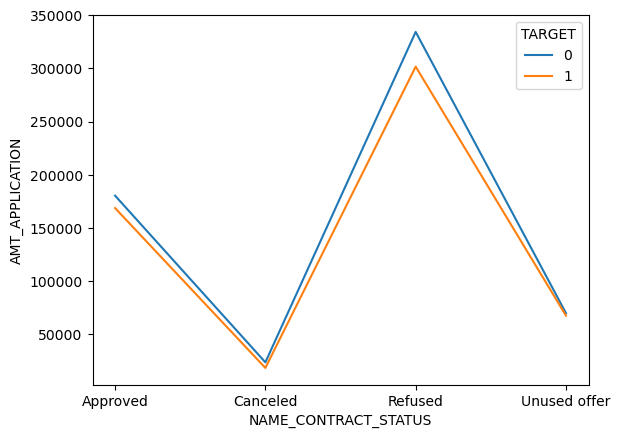

In [431]:
##line plot between NAME_CONRACT_STATUS and AMT_APPLICATION with TARGET
sns.lineplot(data=merge_data,x='NAME_CONTRACT_STATUS',y='AMT_APPLICATION',ci=None,hue='TARGET')
plt.show()

### Inference : 
    -  There are more defaulters for higher loan amounts. This could be because borrowers who take out larger loans are more likely to default on their payments.
    -  The number of defaulters is relatively small compared to the number of repayers. This suggests that most borrowers are able to repay their loans.
     - There are more approved contracts for lower loan amounts. This could be because lenders are more likely to approve loans for smaller amounts, as they are seen as less risky.

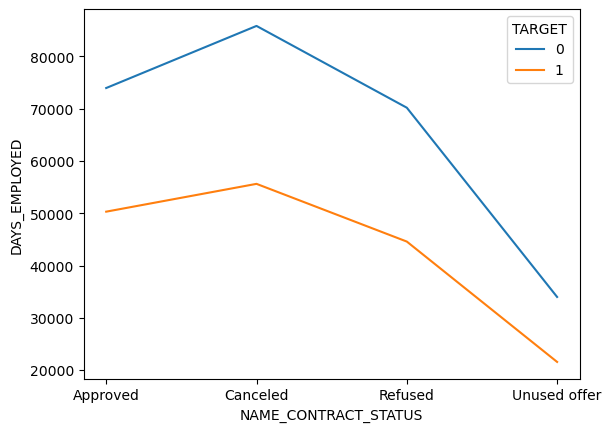

In [432]:
##line plot between NAME_CONRACT_STATUS and DAYS_EMPLOYED with TARGET

sns.lineplot(data=merge_data,x='NAME_CONTRACT_STATUS',y='DAYS_EMPLOYED',ci=None,hue='TARGET')
plt.show()

### Inference : 
    -  The higher the days employed the more approval it can get and the deafulter rate is lower than repaters rate
    - The unused loan are taken by people with least days of employement

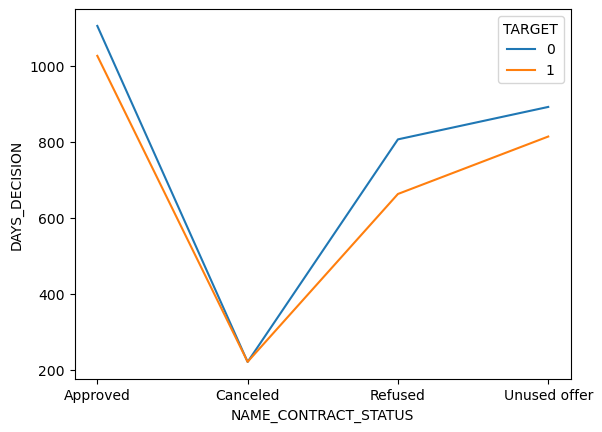

In [433]:
##line plot between NAME_CONRACT_STATUS and DAYS_DECISION with TARGET

sns.lineplot(data=merge_data,x='NAME_CONTRACT_STATUS',y='DAYS_DECISION',ci=None,hue='TARGET')
plt.show()

### INference:
    - The proportion of defaulters increases steadily as the number of days between decisions increases. This suggests that borrowers who have had a longer wait between loan decisions are more likely to default on a new loan.
    

In [434]:
# Getting the numeric columns
merge_data.select_dtypes(include='int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'SK_ID_PREV',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'APPROVED_STATUS', 'CANCELED_STATUS', 'REFUSED_STATUS',
       'UNUSED_STATUS'],
      dtype='object')

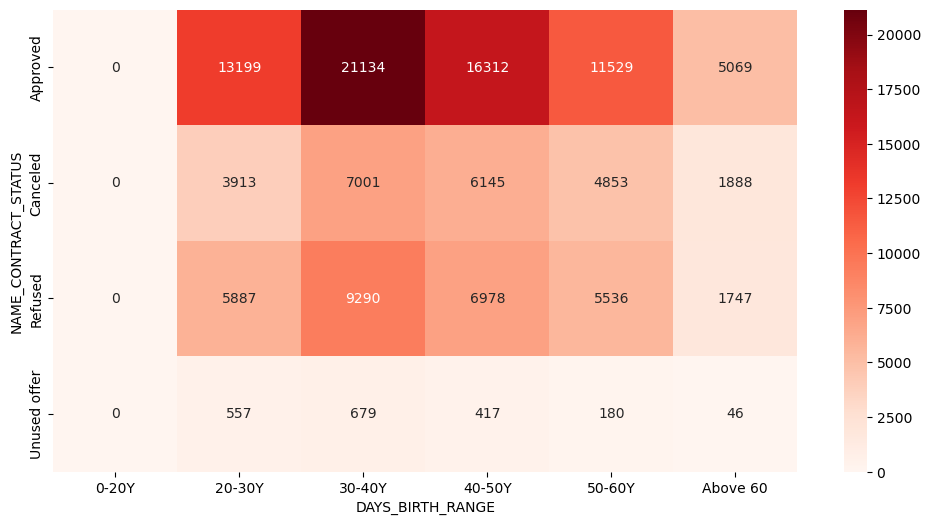

In [435]:
#Plotting heatmap between NAME_CONRACT_STATUS and DAYS_BIRTH with TARGE
res=pd.pivot_table(data=merge_data,index="NAME_CONTRACT_STATUS",columns="DAYS_BIRTH_RANGE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Reds', fmt="g")
plt.show()

### Inference
    -Younger applicants (around 20-30 years old) seem to have the highest default rates ( since more red here means more defaulte rate )
    - Default rates generally decrease with age, reaching a minimum around 40-50 years old
    - Also pople with with more age gets more easy approval than people with less age 

## APPROVED VS TARGET

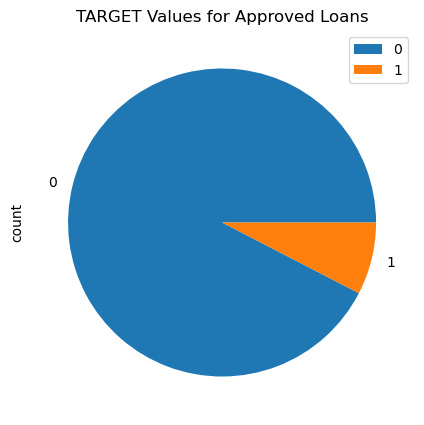

TARGET
0   92.411
1    7.589
Name: proportion, dtype: float64

In [436]:
    plt.figure(figsize=[8,5])
    plt.title('TARGET Values for Approved Loans')
    merge_data[(merge_data['NAME_CONTRACT_STATUS']=='Approved')].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()
    merge_data[(merge_data['NAME_CONTRACT_STATUS']=='Approved')].TARGET.value_counts(normalize=True)*100

In [437]:
merge_data[(merge_data['NAME_CONTRACT_STATUS']=='Approved')].TARGET.value_counts(normalize=True)

TARGET
0   0.924
1   0.076
Name: proportion, dtype: float64

### Inference:
    - about 7 percent of appoved loans are defaulters.

## REFUSED VS TARGET

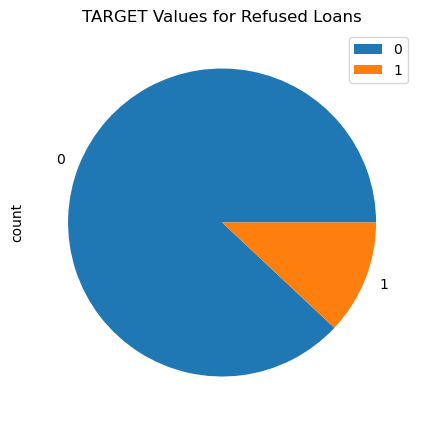

TARGET
0   88.004
1   11.996
Name: proportion, dtype: float64

In [438]:
    plt.figure(figsize=[8,5])
    plt.title('TARGET Values for Refused Loans')
    merge_data[(merge_data['NAME_CONTRACT_STATUS']=='Refused')].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()
    merge_data[(merge_data['NAME_CONTRACT_STATUS']=='Refused')].TARGET.value_counts(normalize=True)*100
    

### Inference:
    - In previouslhy refused loans, there are 12 percent defaulters.

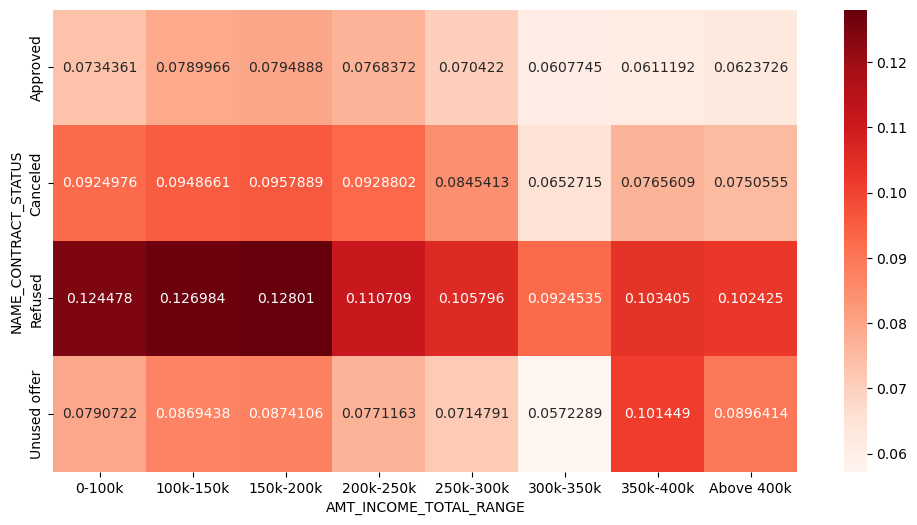

In [439]:
res=pd.pivot_table(data=merge_data,index="NAME_CONTRACT_STATUS",columns="AMT_INCOME_TOTAL_RANGE",values='TARGET', aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Reds', fmt="g")
plt.show()

### Inference
    - Applicants with lower salary ranges (potentially below 100k) seem to have higher default rates
    - The heatmap might show different approval patterns for different salary ranges.
    

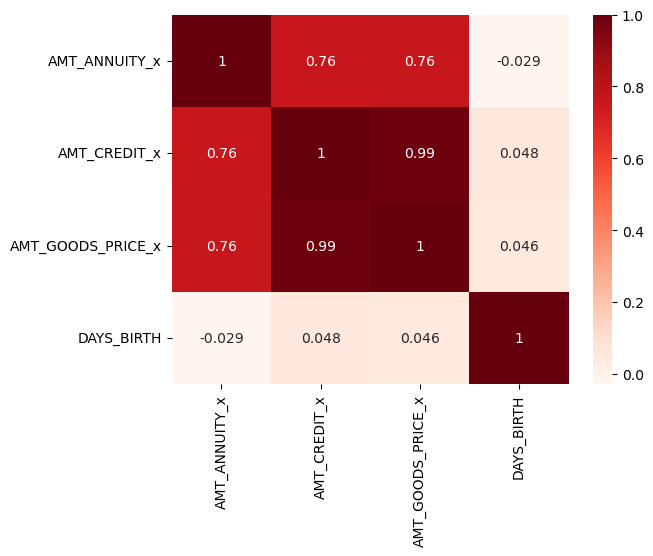

In [440]:
sns.heatmap(merge_data[["AMT_ANNUITY_x","AMT_CREDIT_x", "AMT_GOODS_PRICE_x",'DAYS_BIRTH']].corr(), annot= True, cmap= "Reds")
plt.show()

### inference
    - As expected, AMT_CREDIT and AMT_GOODS and AMT_ANNUITY have High correlation

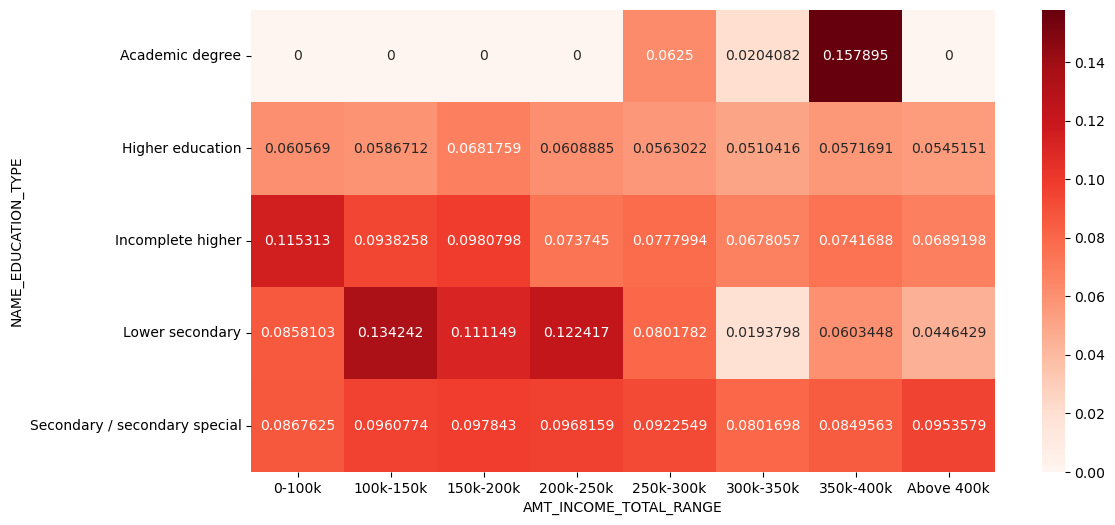

In [441]:
res=pd.pivot_table(data=merge_data,index="NAME_EDUCATION_TYPE",columns="AMT_INCOME_TOTAL_RANGE",values='TARGET', aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Reds', fmt="g")
plt.show()

### inference
    - As expected, people with lower education are highly to be deafulted
    - But I could see that Pepole with higher eduaction with range of 350k-400k salary has more default rate, but it
        might be a defaulter also.